### INITIALISATION
 a run a chaque début de sessions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from decimal import *
import seaborn as sns
import statsmodels.api as sm
import scipy
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.metrics import r2_score
!pip install fanalysis
from fanalysis.mca import MCA

sns.color_palette("mako", as_cmap=True)

# la base de sonnée est à importer dans notre google colab, on l'appelle ainsi :
data = "/content/Maths.csv"
df=pd.read_csv(data, header=0)
df.head(5)

# verification de la cohérence des data types :

df.dtypes
#les types sont corrects

#Conversion des données

#for colonne in df.columns:
 # if df.dtypes(colonne)=="object":
   # df[colonne]=df[colonne].astype("string")

df["school"]=df["school"].astype("string")
df["sex"]=df["sex"].astype("string")
df["address"]=df["address"].astype("string")
df["famsize"]=df["famsize"].astype("string")

df["Pstatus"]=df["Pstatus"].astype("string")
df["Mjob"]=df["Mjob"].astype("string")
df["Fjob"]=df["Fjob"].astype("string")
df["reason"]=df["reason"].astype("string")

df["guardian"]=df["guardian"].astype("string")
df["schoolsup"]=df["schoolsup"].astype("string")

df["famsup"]=df["famsup"].astype("string")
df["paid"]=df["paid"].astype("string")
df["activities"]=df["activities"].astype("string")
df["nursery"]=df["nursery"].astype("string")
df["higher"]=df["higher"].astype("string")
df["internet"]=df["internet"].astype("string")
df["romantic"]=df["romantic"].astype("string")



# taille
taille=df.index
taille

df.dtypes


print('Nombre de ligne avant nettoyage : ', df.shape[0])
print('Nombre de colonne avant nettoyage : ', df.shape[1])

#Supression des colonnes vides

vide = [colonne for colonne in df.columns if df[colonne].isnull().all()]
df.drop(vide, axis = 1, inplace = True)

#Remplacage des données manquantes (faire la moyenne)
#for colonne in df.columns :
# moyenne = df[colonne].mean()
# df[colonne].replace(np.nan, moyenne)


#Supression des éléments dupliqués
df.drop_duplicates()

# suppression variable guardian (=tuteur de l'élève (nominal : « mère », « père » ou « autre »))  --> pas pertinent
del df['guardian']

# suppression de la variable reason (raison de choisir cette école) -> nous intéresse pas
del df['reason']

#suppression variable nursery ( savoir si on a été à l'école maternelle )
del df['nursery']

del df['G1']
del df['G2']

print('Nombre de ligne après nettoyage : ', df.shape[0])
print('Nombre de colonne après nettoyage : ', df.shape[1])

target='G3'

#Création d'un dataset avec les variables qualitatives transformés en quantitative
columns = df.select_dtypes(include=['string']).columns #on selectionne les variables categorie
newdf=df[:]
for i in columns:
  newdf=pd.get_dummies(newdf, columns=[i], drop_first=True) #on transforme les categories en binaire. Ainsi sil y a a plus de 2 reponses, création de nouvelle colonnes
newdf.dtypes

#Création d'une database normalisé(sauf pour la target)
df_normal = newdf.copy()
colonne=df_normal.columns.drop(target)
# apply normalization techniques
for column in colonne:
    df_normal[column] = df_normal[column]  / df_normal[column].abs().max()

#Personne au dessus et en dessous de la moyenne
df['Grade_binomial'] = [1 if s >=10 else 0 for s in df[target]] #On transforme la target en binomial
df['Grade_binomial'].describe()

df.head(5)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 4.0 MB/s 
Nombre de ligne avant nettoyage :  395
Nombre de colonne avant nettoyage :  33
Nombre de ligne après nettoyage :  395
Nombre de colonne après nettoyage :  28


school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

   romantic  famrel  freetime goout Dalc Walc health absences  G3  \
0        no       4         3     4    1    1      3        6   6   
1        no       5         3     3    1    1      3        4   6   
2        no       4         3     2    2    3      3       10  10   
3       yes       3         2     2    1    1      5        2  15   
4        no       4         3     2    1    2      5        4  10   

  Grade_binomial  
0              0  
1              0  
2              1  
3              1  
4              1  

[5 rows x 29 columns]

###Population étudiée


In [ ]:
#Types données
print(df.dtypes)

#Nombre d'individus
print("\nNombre d'individus" )
print(df.shape[0])


#Nombre de variables
print("Nombre de variables" )
print(df.shape[1])

#Etudes des variables
ecole=df.groupby(['school'])['school'].count()
print(ecole)
#Il y a 349 à l'école Gabriel Pereira et 46 à Mousinho da Silveira.

sexe=df.groupby(['sex'])['sex'].count()
print(sexe)
#L'étude est réalisée sur un echantillon comportant 208 filles et 187 garçons.

school            string
sex               string
age                int64
address           string
famsize           string
Pstatus           string
Medu               int64
Mjob              string
Fjob              string
traveltime         int64
studytime          int64
failures           int64
schoolsup         string
famsup            string
paid              string
activities        string
higher            string
internet          string
romantic          string
famrel             int64
freetime           int64
goout              int64
Dalc               int64
Walc               int64
health             int64
absences           int64
G3                 int64
Grade_binomial     int64
dtype: object

Nombre d'individus
395
Nombre de variables
28
school
GP    349
MS     46
Name: school, dtype: int64
sex
F    208
M    187
Name: sex, dtype: int64


### CAH K MEANS



In [ ]:
# importations nécessaires
from matplotlib  import  pyplot  as  plt
from  scipy.cluster.hierarchy  import  dendrogram
import numpy as np


In [ ]:
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

columns = df.select_dtypes(include=['string']).columns #on selectionne les variables categorie
newdf=df[:]
for i in columns:
  newdf=pd.get_dummies(newdf, columns=[i], drop_first=True) #on transforme les categories en binaire. Ainsi sil y a a plus de 2 reponses, création de nouvelle colonnes
newdf.dtypes

NameError: ignored

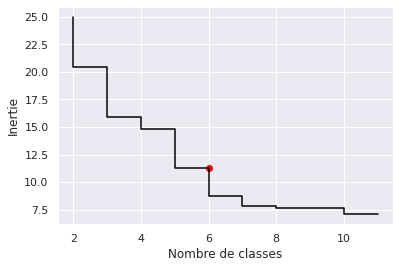

In [ ]:
cols = ["Medu", "studytime", "goout", "sex_M", "famsize_LE3", "higher_yes", "romantic_yes"];
df3 = newdf[cols]
#generer un diagramme d'inertie pour définir le nombre optima de catégories / classes
import numpy as np

Z = linkage(df3.iloc[:395],method='ward',
      metric='euclidean')

last = Z[-10:, 2]

last_rev = last[::-1]

idxs = np.arange(2, len(last) + 2)

plt.step(idxs, last_rev, c="black")

plt.xlabel("Nombre de classes")

plt.ylabel("Inertie")

nombre = 6 # Ici, on teste le scénario où il y aurait 3 catégories

plt.scatter(idxs[np.where(idxs==nombre)], last_rev[np.where(idxs==nombre)], c="red")


plt.show()

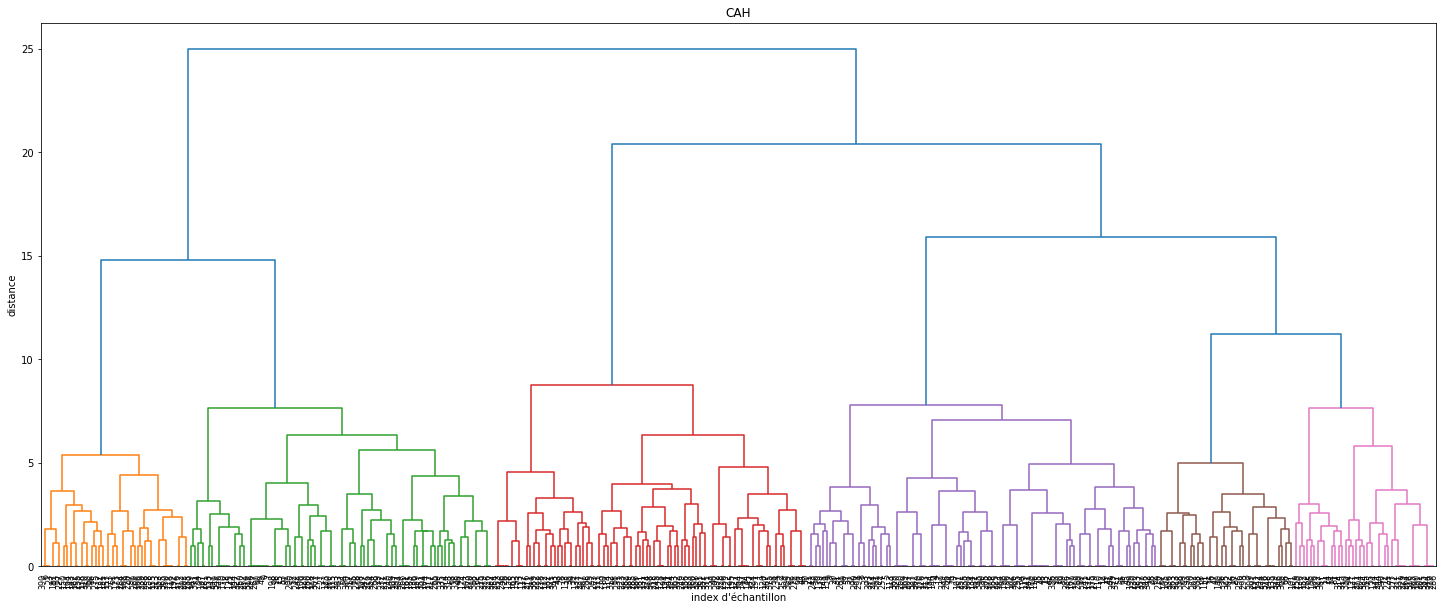

In [ ]:
#librairies pour la CAH
# ['Medu', 'studytime', 'goout', 'sex_M', 'famsize_LE3', 'higher_yes', 'romantic_yes']

# avec R^2 , techniques backward et forward , prédit

cols = ["Medu", "studytime", "goout", "sex_M", "famsize_LE3", "higher_yes", "romantic_yes"];
#cols = [];
df3 = newdf[cols]

#Z = linkage(df.iloc[:,0:4],method='ward',
Z = linkage(df3.iloc[:395],method='ward',
      metric='euclidean')

#affichage du dendrogramme


plt.figure(figsize=(25,10))
plt.xlabel("index d'échantillon")
plt.ylabel("distance")
plt.title("CAH")
dendrogram(Z,labels=df3.index,leaf_rotation = 90. , leaf_font_size = 8. ,


      color_threshold=9)


plt.show()

In [ ]:
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

X1 = pd.DataFrame(df3, columns = ['Medu', 'studytime', 'goout', 'sex_M', 'famsize_LE3','higher_yes', 'romantic_yes'])
model=KMeans(n_clusters=5)
X1.head(5)
model=KMeans(n_clusters=5)
model.fit(X1)
model.predict(X1)

#plt.scatter(X1.iloc[:,0], X1.iloc[:,1], c=model.predict(X1))
model.cluster_centers_



array([[1.59615385, 1.92307692, 4.36538462, 0.48076923, 0.32692308,
        0.88461538, 0.36538462],
       [3.59      , 1.7       , 2.41      , 0.57      , 0.34      ,
        0.97      , 0.35      ],
       [2.98571429, 3.32857143, 2.61428571, 0.27142857, 0.14285714,
        1.        , 0.34285714],
       [1.53333333, 1.67777778, 2.34444444, 0.46666667, 0.32222222,
        0.91111111, 0.3       ],
       [3.57831325, 1.80722892, 4.40963855, 0.53012048, 0.28915663,
        0.96385542, 0.3253012 ]])

Text(0, 0.5, 'inertie')

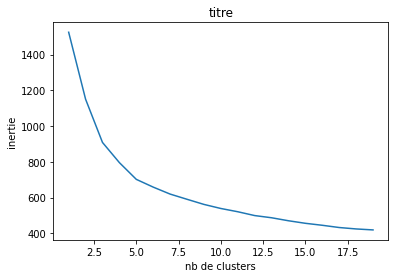

In [ ]:
mathoub=[]
K1_range=range(1,20)
for k in K1_range :
  model= KMeans(n_clusters=k).fit(X1)
  mathoub.append(model.inertia_)

plt.plot(K1_range, mathoub)
plt.title("titre")
plt.xlabel("nb de clusters")
plt.ylabel("inertie")

In [ ]:
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
#from sklearn.datasets import make_blobs

X2 = pd.DataFrame(df, columns = ['absences','G3'])


X2

absences  G3
0           6   6
1           4   6
2          10  10
3           2  15
4           4  10
..        ...  ..
390        11   9
391         3  16
392         3   7
393         0  10
394         5   9

[395 rows x 2 columns]

array([[ 3.05904059, 11.97785978],
       [14.85897436, 10.30769231],
       [52.6       ,  9.4       ],
       [ 0.09756098,  0.41463415]])

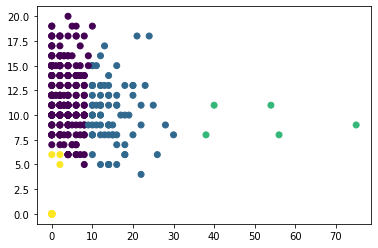

In [ ]:
model=KMeans(n_clusters=4)
model.fit(X2)
model.predict(X2)

plt.scatter(X2.iloc[:,0], X2.iloc[:,1], c=model.predict(X2))
model.cluster_centers_



Text(0, 0.5, 'inertie')

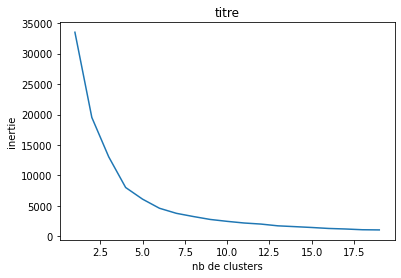

In [ ]:
mathoub=[]
K_range=range(1,20)
for k in K_range :
  model= KMeans(n_clusters=k).fit(X2)
  mathoub.append(model.inertia_)

plt.plot(K_range, mathoub)
plt.title("titre")
plt.xlabel("nb de clusters")
plt.ylabel("inertie")

In [ ]:
cols = ["Medu","age","higher_yes"];
df2 = newdf[cols]
df2.head()

Medu  age  higher_yes
0     4   18           1
1     1   17           1
2     1   15           1
3     4   15           1
4     3   16           1

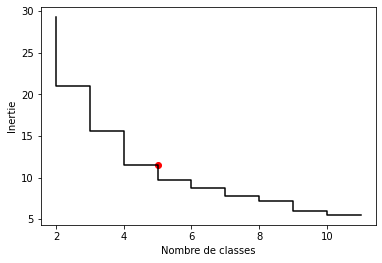

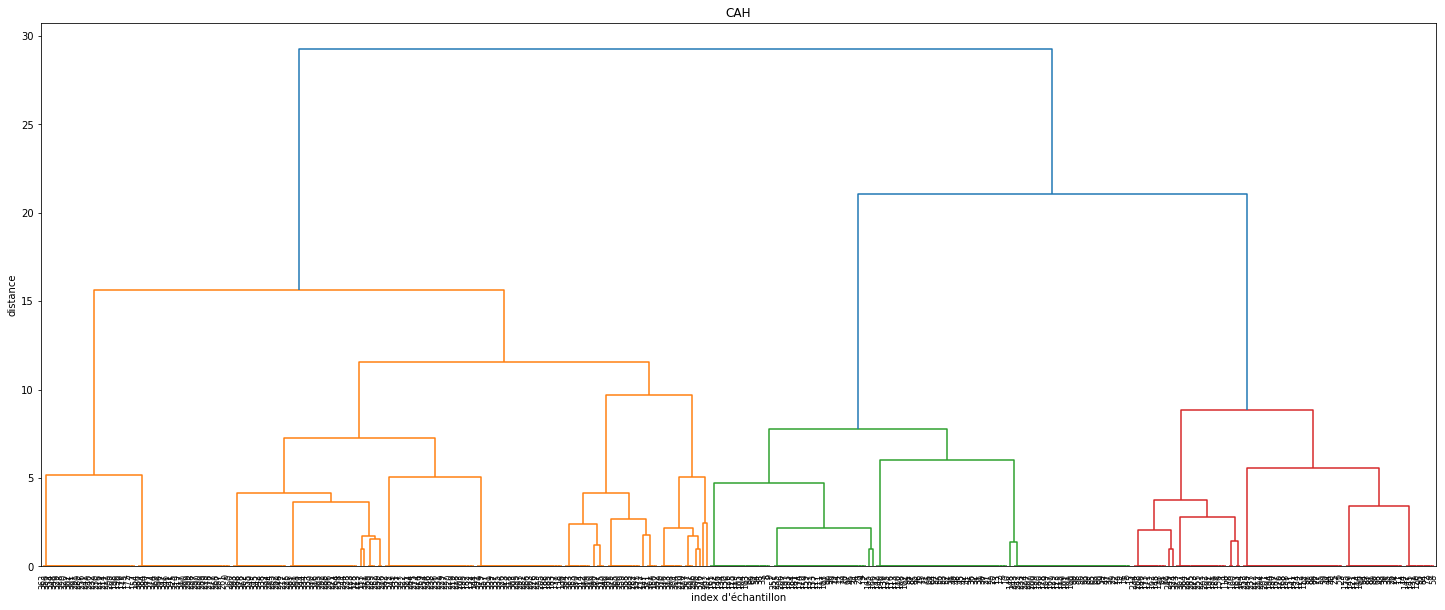

In [ ]:
# deuxième test
# ['Medu', 'higher_yes', 'goout', 'romantic_yes', 'sex_M', 'studytime', 'famsize_LE3']

#generer un diagramme d'inertie pour définir le nombre optima de catégories / classes
import numpy as np

Z = linkage(df2.iloc[:395],method='ward',
      metric='euclidean')

last = Z[-10:, 2]

last_rev = last[::-1]

idxs = np.arange(2, len(last) + 2)

plt.step(idxs, last_rev, c="black")

plt.xlabel("Nombre de classes")

plt.ylabel("Inertie")
nombre = 5 # Ici, on teste le scénario où il y aurait 3 catégories
plt.scatter(idxs[np.where(idxs==nombre)], last_rev[np.where(idxs==nombre)], c="red")
plt.show()


#affichage du dendrogramme


plt.figure(figsize=(25,10))
plt.xlabel("index d'échantillon")
plt.ylabel("distance")
plt.title("CAH")
dendrogram(Z,labels=df2.index,leaf_rotation = 90. , leaf_font_size = 8. ,


      color_threshold=17)


plt.show()


In [ ]:
X3 = pd.DataFrame(df2, columns = ['Medu','age','higher_yes'])
X3
model=KMeans(n_clusters=4)
model.fit(X3)
model.predict(X3)

#plt.scatter(X3.iloc[:,0], X3.iloc[:,1], c=model.predict(X3))
model.cluster_centers_


array([[ 3.61344538, 15.52941176,  0.98319328],
       [ 3.52252252, 17.7027027 ,  0.96396396],
       [ 1.68656716, 15.6119403 ,  0.98507463],
       [ 1.55102041, 17.71428571,  0.86734694]])

Text(0, 0.5, 'inertie')

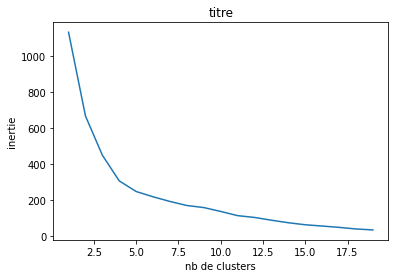

In [ ]:
mathou3=[]
K_range3=range(1,20)
for k in K_range3 :
  model= KMeans(n_clusters=k).fit(X3)
  mathou3.append(model.inertia_)

plt.plot(K_range3, mathou3)
plt.title("titre")
plt.xlabel("nb de clusters")
plt.ylabel("inertie")

### AFC

In [ ]:
#on choisit d'effectuer une AFc sur 2 variables : temps de travail et la note G3
#pour cela il faut convertir G3 en variable qualitative

df["Note Qualitative"] = "mauvais"

for i in range(len(df)):
  note = df["G3"][i]
  if note >= 15 :
    df["Note Qualitative"][i] = 'bon'
  elif note >=10 :
    df["Note Qualitative"][i] = 'moyen'
  elif note < 10 :
    df["Note Qualitative"][i] = 'mauvais'

#obtenons maintenant le tableau de fréquence en fonction de ces données

# Tableau de contingence
X = "Note Qualitative"
Y = "studytime"

cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
print(cont)

studytime          1   2   3   4
Note Qualitative                
bon               18  31  17   7
mauvais           37  70  16   7
moyen             50  97  32  13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
!pip install fanalysis

from fanalysis.ca import CA
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 4.9 MB/s 


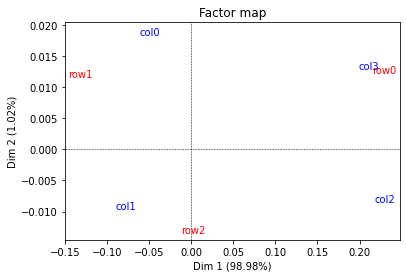

In [ ]:
X = cont.to_numpy()
my_ca = CA(row_labels=df.index.values, col_labels=df.columns.values)
my_ca.fit(X)
df_rows = my_ca.row_topandas()
df_cols = my_ca.col_topandas()
my_ca.mapping(num_x_axis=1, num_y_axis=2)

#https://github.com/OlivierGarciaDev/fanalysis/blob/master/doc/ca_tutorial.ipynb


### DBSCAN


In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 13.3 MB/s 
     |████████████████████████████████| 6.3 MB 62.0 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 46 kB 5.2 MB/s 


In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

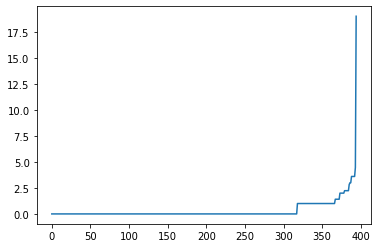

In [ ]:
#création du jeu de donnée, choisissons 2 paramètres à étudier
#ici absence et note G3
#https://datascientest.com/machine-learning-clustering-dbscan


X = pd.DataFrame(df, columns = ['absences', 'G3'])


neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);




In [ ]:
# choisissons un E tq 90% des observations aient une distance au proche voisin inférieure à E, ici 5 est pas mal

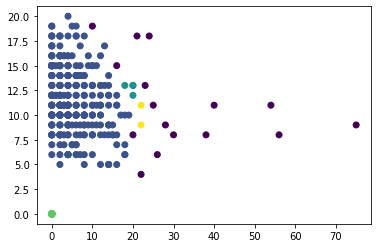

In [ ]:
y_pred = DBSCAN(eps = 2, min_samples=2).fit_predict(X)
plt.scatter(X['absences'],X['G3'],c = y_pred);

### ACP ?

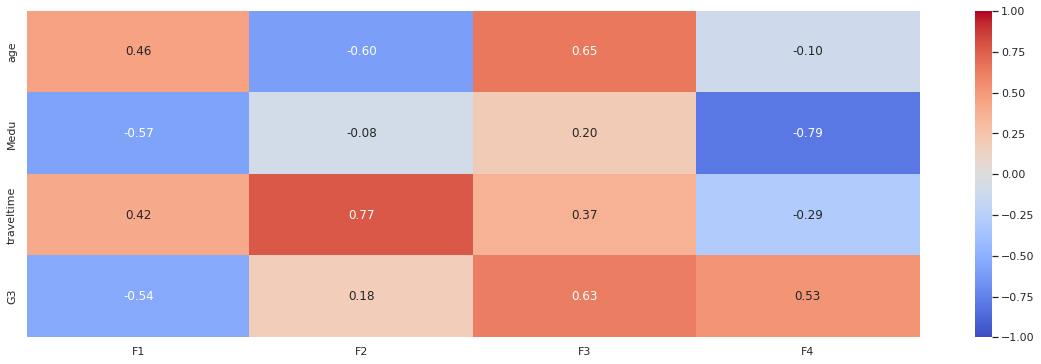

In [ ]:
sns.set()

df.isna().mean()
# Quel est le % de valeurs manquantes par colonne ?
df.nunique()
# Combien y a-t-il de valeurs différentes par colonne ?
# cols = ["age","studytime","traveltime","failures","famrel","freetime","goout","Dalc","Walc","health","absences","G3"]
cols = ["age","Medu","traveltime","G3"]
df = df[cols]
df.head()
X = df.values
X[:6]
# cols2 = ["age","studytime","traveltime"]
# features = df[cols2]
features = df.columns
features
# Commençons par scaler les données. On instancie :
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[:5]
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]
n_components = 4
pca = PCA(n_components=n_components)
pca.fit(X_scaled)
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree
pcs = pca.components_
pcs
pcs = pd.DataFrame(pcs)
pcs
x_list = range(1, n_components+1)
list(x_list)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
pcs.T
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

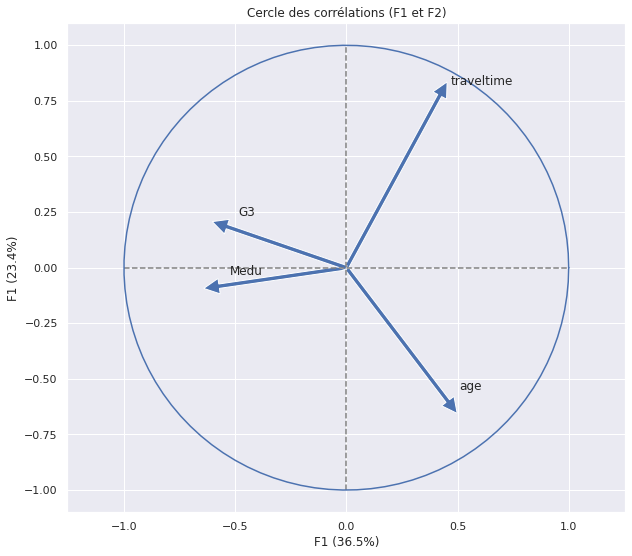

In [ ]:
x, y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07,
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

### ACP

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

!pip install fanalysis
from fanalysis.pca import PCA
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sns.set()
df1 = pd.read_csv("Maths.csv")
df.head()
df.info()
#Conversion des données
#for colonne in df.columns:
 # if df.dtypes(colonne)=="object":
   # df[colonne]=df[colonne].astype("string")
df1['school']=df1['school'].astype("string")
df1["sex"]=df1["sex"].astype("string")
df1["address"]=df1["address"].astype("string")
df1["famsize"]=df1["famsize"].astype("string")

df1["Pstatus"]=df1["Pstatus"].astype("string")
df1["Mjob"]=df1["Mjob"].astype("string")
df1["Fjob"]=df1["Fjob"].astype("string")
df1["reason"]=df1["reason"].astype("string")

df1["guardian"]=df1["guardian"].astype("string")
df1["schoolsup"]=df1["schoolsup"].astype("string")

df1["famsup"]=df1["famsup"].astype("string")
df1["paid"]=df1["paid"].astype("string")
df1["activities"]=df1["activities"].astype("string")
df1["nursery"]=df1["nursery"].astype("string")
df1["higher"]=df1["higher"].astype("string")
df1["internet"]=df1["internet"].astype("string")
df1["romantic"]=df1["romantic"].astype("string")
cols = ["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences","G3"]
df1 = df1[cols]
df1.head()

X = df1.values
X[:6]
pca = PCA(std_unit=True, row_labels=df1.index.values, col_labels=df1.columns.values[0:13])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         395 non-null    int64
 1   Medu        395 non-null    int64
 2   traveltime  395 non-null    int64
 3   G3          395 non-null    int64
dtypes: int64(4)
memory usage: 12.5 KB


In [ ]:
# cols2 = ["age","studytime","traveltime"]
# features = df[cols2]
features = df.columns
features
covariance_matrix = np.cov(X.T)
print("Covariance matrix:\n", covariance_matrix)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvectors:\n", eigen_vectors, "\n")
print("Eigenvalues:\n", eigen_values)


Covariance matrix:
 [[ 1.62828504e+00 -2.28619161e-01 -2.26948532e-01  6.28734820e-02
  -4.43359250e-03  2.31221487e-01  6.17168926e-02  2.09471182e-02
   1.80363683e-01  1.49039388e-01  1.92732764e-01 -1.10325773e-01
   1.78950074e+00 -9.44612221e-01]
 [-2.28619161e-01  1.19844503e+00  7.42716700e-01 -1.31060849e-01
   5.96671593e-02 -1.92681360e-01 -3.84244683e-03  3.37788344e-02
   7.81147594e-02  1.93407441e-02 -6.64396325e-02 -7.13487117e-02
   8.78622374e-01  1.08909593e+00]
 [-2.26948532e-01  7.42716700e-01  1.18418043e+00 -1.20073251e-01
  -8.37884727e-03 -2.02640879e-01 -1.33650324e-03 -1.39626036e-02
   5.22200090e-02  2.31317869e-03 -1.77022425e-02  2.23028979e-02
   2.13133715e-01  7.60078391e-01]
 [ 6.28734820e-02 -1.31060849e-01 -1.20073251e-01  4.86512883e-01
  -5.90695881e-02  4.78442460e-02 -1.05121121e-02 -1.18614663e-02
   2.21615370e-02  8.59410139e-02  1.20478057e-01  7.27366189e-03
  -7.22547067e-02 -3.74336567e-01]
 [-4.43359250e-03  5.96671593e-02 -8.37884727e-0

64.20531449328794
21.23333811991025
2.635184219304968
2.074184397493871
1.923811027823525
1.358068314731606
1.113267331904904
0.7992613271963999
0.6760510500637319
0.5979664375936774
0.3249160235675409
0.38542893013352314
0.44047832062287884
0.4528032570237806
[ 65.36883182  86.98695672  89.66989528  91.78166768  93.74034167
  95.12302066  96.25646243  97.07020783  97.75851015  98.36731283
  98.69811693  99.09053053  99.53899112 100.        ]


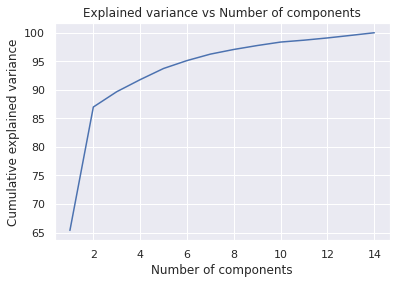

In [ ]:
for val in eigen_values:
    print(val)
variance_explained = [(i / sum(eigen_values)) * 100 for i in eigen_values]
variance_explained
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)
sns.lineplot(x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], y = cumulative_variance_explained,palette="mako");
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

In [ ]:
pca.fit(X)
print(pca.eig_)


[[  2.48057137   1.93478065   1.27965761   1.16867183   1.0647392
    1.00012727   0.90748584   0.89769469   0.71841402   0.70035345
    0.6178696    0.57741475   0.36122586   0.29099388]
 [ 17.71836692  13.81986177   9.14041152   8.34765592   7.60527998
    7.14376621   6.48204171   6.4121049    5.13152871   5.00252462
    4.41335426   4.12439108   2.5801847    2.0785277 ]
 [ 17.71836692  31.53822869  40.6786402   49.02629613  56.6315761
   63.77534231  70.25738402  76.66948893  81.80101764  86.80354226
   91.21689651  95.3412876   97.9214723  100.        ]]


In [ ]:
df_rows = pca.row_topandas()
df_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_coord_dim1     395 non-null    float64
 1   row_coord_dim2     395 non-null    float64
 2   row_coord_dim3     395 non-null    float64
 3   row_coord_dim4     395 non-null    float64
 4   row_coord_dim5     395 non-null    float64
 5   row_coord_dim6     395 non-null    float64
 6   row_coord_dim7     395 non-null    float64
 7   row_coord_dim8     395 non-null    float64
 8   row_coord_dim9     395 non-null    float64
 9   row_coord_dim10    395 non-null    float64
 10  row_coord_dim11    395 non-null    float64
 11  row_coord_dim12    395 non-null    float64
 12  row_coord_dim13    395 non-null    float64
 13  row_coord_dim14    395 non-null    float64
 14  row_contrib_dim1   395 non-null    float64
 15  row_contrib_dim2   395 non-null    float64
 16  row_contrib_dim3   395 non

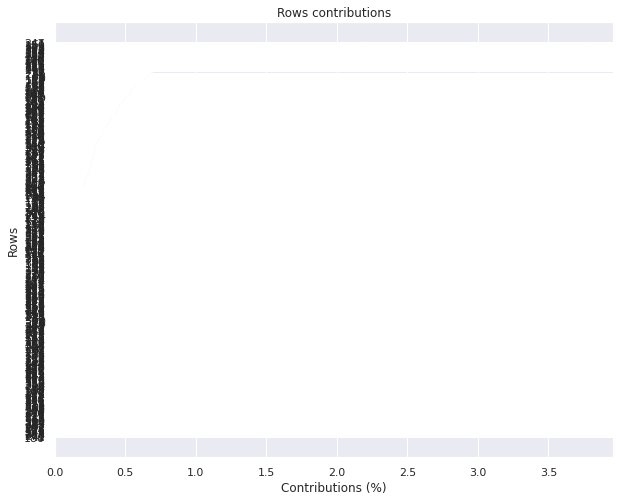

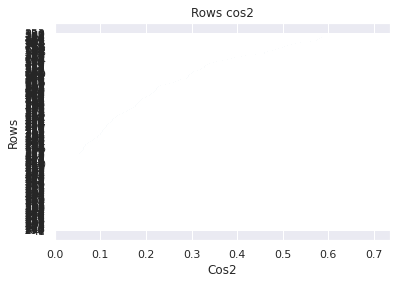

In [ ]:
pca.plot_row_contrib(num_axis=1,figsize=(10, 8))
pca.plot_row_cos2(num_axis=1)

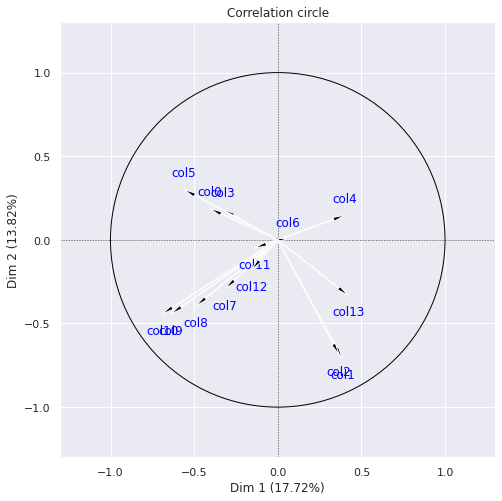

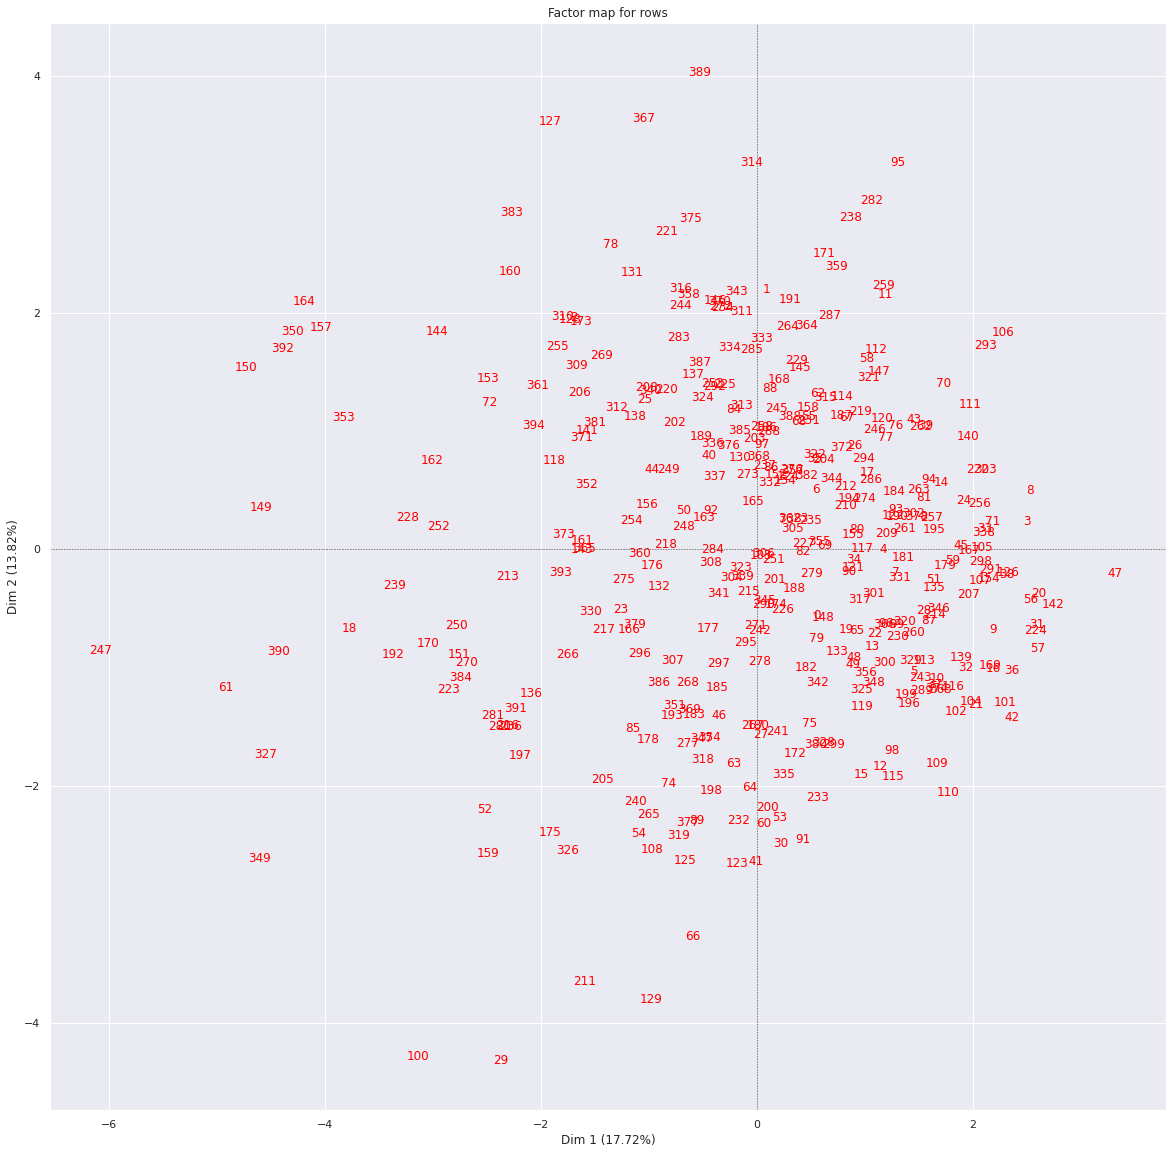

In [ ]:
pca.correlation_circle(1, 2, figsize=(10, 8))
pca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(20, 20))

In [ ]:
# interprétation
df_rows.sort_values(by = ['row_contrib_dim1', 'row_contrib_dim2'], ascending = [False, False])

row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
247       -6.076157       -0.851033       -1.255175        3.597081   
61        -4.920590       -1.170376        1.639753       -2.186932   
150       -4.730619        1.533220       -0.833896       -0.366661   
349       -4.603823       -2.610883       -0.753577       -1.148119   
149       -4.590997        0.353596        1.701554       -2.047087   
..              ...             ...             ...             ...   
203       -0.019370        0.932343       -0.269716        0.704015   
368        0.011420        0.783391        0.333401       -0.162902   
271       -0.010348       -0.642746        0.757309        2.250312   
41        -0.007658       -2.641392        1.188095       -0.815113   
180        0.006171       -1.487456       -0.684991       -0.201128   

     row_coord_dim5  row_coord_dim6  row_coord_dim7  row_coord_dim8  \
247       -0.378987        0.096847       -0.777602        0.838364   
61        -2.865077        1.128717        1.730978        0.291893   
150        1.989152       -1.966801       -1.501158       -0.852836   
349       -0.689359        0.062801       -0.932430       -0.546270   
149       -0.123848       -0.442482        1.347583        0.985239   
..              ...             ...             ...             ...   
203        0.574581        1.393444       -0.452664        1.262398   
368        0.153939        0.795560        1.346052        0.655058   
271       -1.902140       -1.495308       -0.528739       -0.952353   
41         0.777632        1.076067       -0.196642        0.393235   
180        0.444382       -0.674336       -0.657054        0.026141   

     row_coord_dim9  row_coord_dim10  ...  row_cos2_dim5  row_cos2_dim6  \
247        2.103175         0.861874  ...       0.002229       0.000146   
61        -0.762171        -0.247070  ...       0.169037       0.026235   
150        0.412401        -0.212356  ...       0.102447       0.100158   
349       -0.354544         1.793504  ...       0.012915       0.000107   
149       -2.166184         0.433412  ...       0.000345       0.004406   
..              ...              ...  ...            ...            ...   
203        0.303114        -1.296298  ...       0.036129       0.212486   
368        1.699949        -0.566842  ...       0.002975       0.079469   
271       -0.662594         0.623034  ...       0.221234       0.136719   
41         0.257304        -0.715486  ...       0.048568       0.093000   
180       -0.569338         0.219950  ...       0.035919       0.082710   

     row_cos2_dim7  row_cos2_dim8  row_cos2_dim9  row_cos2_dim10  \
247       0.009385       0.010909       0.068655        0.011529   
61        0.061701       0.001755       0.011962        0.001257   
150       0.058347       0.018832       0.004404        0.001168   
349       0.023628       0.008110       0.003416        0.087419   
149       0.040870       0.021846       0.105605        0.004228   
..             ...            ...            ...             ...   
203       0.022424       0.174399       0.010055        0.183891   
368       0.227497       0.053878       0.362847        0.040344   
271       0.017094       0.055458       0.026845        0.023735   
41        0.003106       0.012420       0.005317        0.041116   
180       0.078525       0.000124       0.058959        0.008799   

     row_cos2_dim11  row_cos2_dim12  row_cos2_dim13  row_cos2_dim14  
247        0.056066        0.004731        0.020614        0.006178  
61         0.003281        0.011542        0.001292        0.031286  
150        0.001075        0.045386        0.000368        0.006033  
349        0.001948        0.000120        0.016217        0.033581  
149        0.025385        0.146698        0.000017        0.013953  
..              ...             ...             ...             ...  
203        0.000006        0.190585        0.001830        0.010827  
368        0.107492  

In [ ]:
df1.loc[247]
# df1.loc[61]
# df1.loc[100]
# df1.loc[57]
# df1.loc[100]

age           22
Medu           3
Fedu           1
traveltime     1
studytime      1
failures       3
famrel         5
freetime       4
goout          5
Dalc           5
Walc           5
health         1
absences      16
G3             8
Name: 247, dtype: int64

### ACM

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_binarization', '_check_feature_names', '_check_n_features', '_compute_stats', '_compute_svd', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'c_', 'col_contrib_', 'col_coord_', 'col_cos2_', 'col_labels', 'col_labels_', 'col_labels_short_', 'col_labels_short_temp_', 'col_labels_temp_', 'col_topandas', 'eig_', 'fit', 'fit_transform', 'get_params', 'mapping', 'mapping_col', 'mapping_row', 'model_', 'n_', 'n_categories_', 'n_components', 'n_components_', 'n_vars_', 'plot_col_contrib', 'plot_col_cos2', 'plot_eigenvalues', 'plot_row_contrib', 'plo

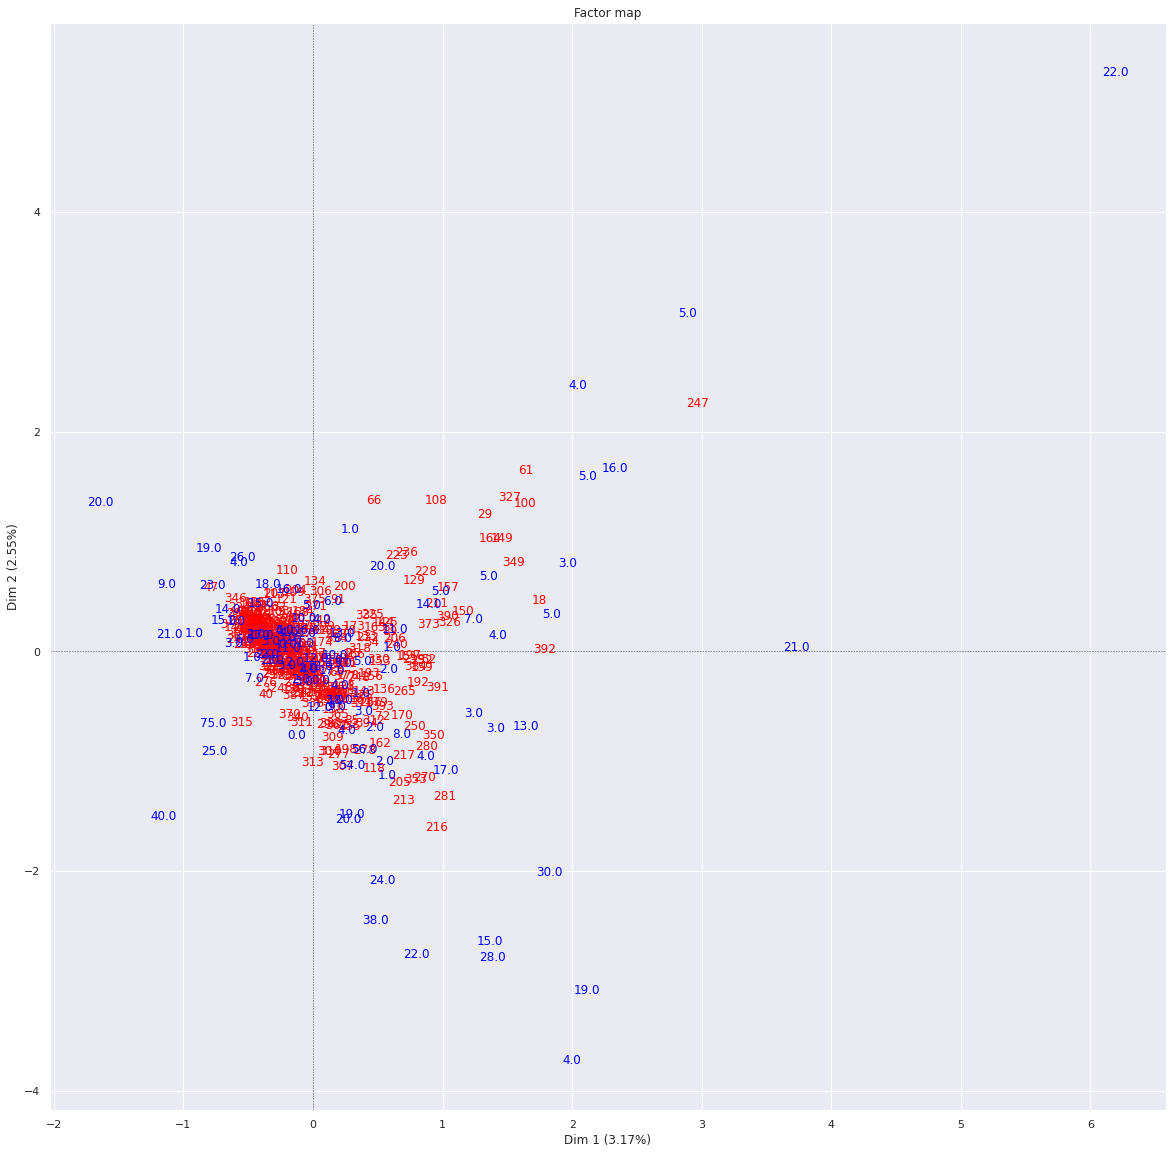

In [ ]:
#instanciation
acm = MCA(row_labels=df.index, var_labels=df.columns)
cols = ["age","Medu","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences","G3"]
df2 = df[cols]
df2.head()
acm.fit(df2.values)

#propriétés
print(dir(acm))

#récupération des infos - nombre de variables
p = df2.shape[1]

#nombre d'observations
n = df2.shape[0]

#codage en 0/1
X = pd.get_dummies(df2,prefix='',prefix_sep='')
print(X)

#nombre total de modalités
M = X.shape[1]
#nombre max de facteurs
Hmax = M-p

#numpy
import numpy

#valeurs propres
# print(pd.DataFrame(numpy.transpose(acm.eig_),columns=['Val.P','%','Cumul %'],index=range(1,Hmax+1)))

#représentation dans le plan
acm.mapping(num_x_axis=1,num_y_axis=2,figsize=(20, 20))

In [ ]:
#coordonnées sur le 1er facteur
print(pd.DataFrame(acm.row_coord_[:,0],index=df2.index))

            0
0   -0.333177
1   -0.362081
2    0.273148
3   -0.686439
4   -0.227527
..        ...
390  1.041763
391  0.964681
392  1.787004
393  0.540468
394  0.412511

[395 rows x 1 columns]


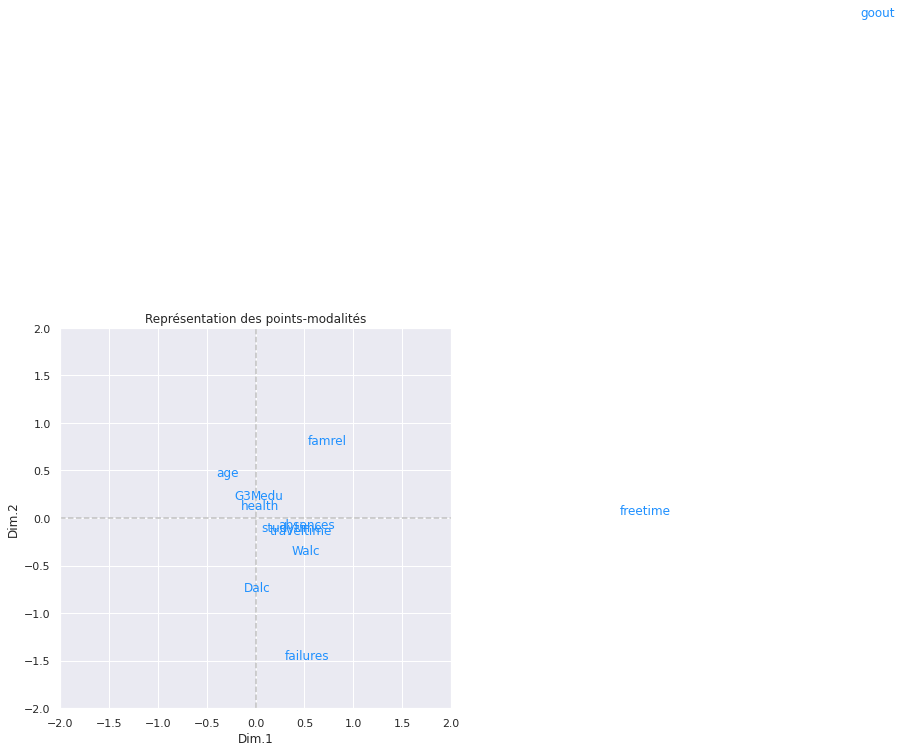

In [ ]:
#représentation dans le plan
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-2,+2,-2,+2])
ax.plot([-2,+2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-2,+2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation des points-modalités")

for i in range(X.shape[1]):
    ax.text(acm.col_coord_[i,0],acm.col_coord_[i,1],X.columns[i],color='dodgerblue')

plt.show()

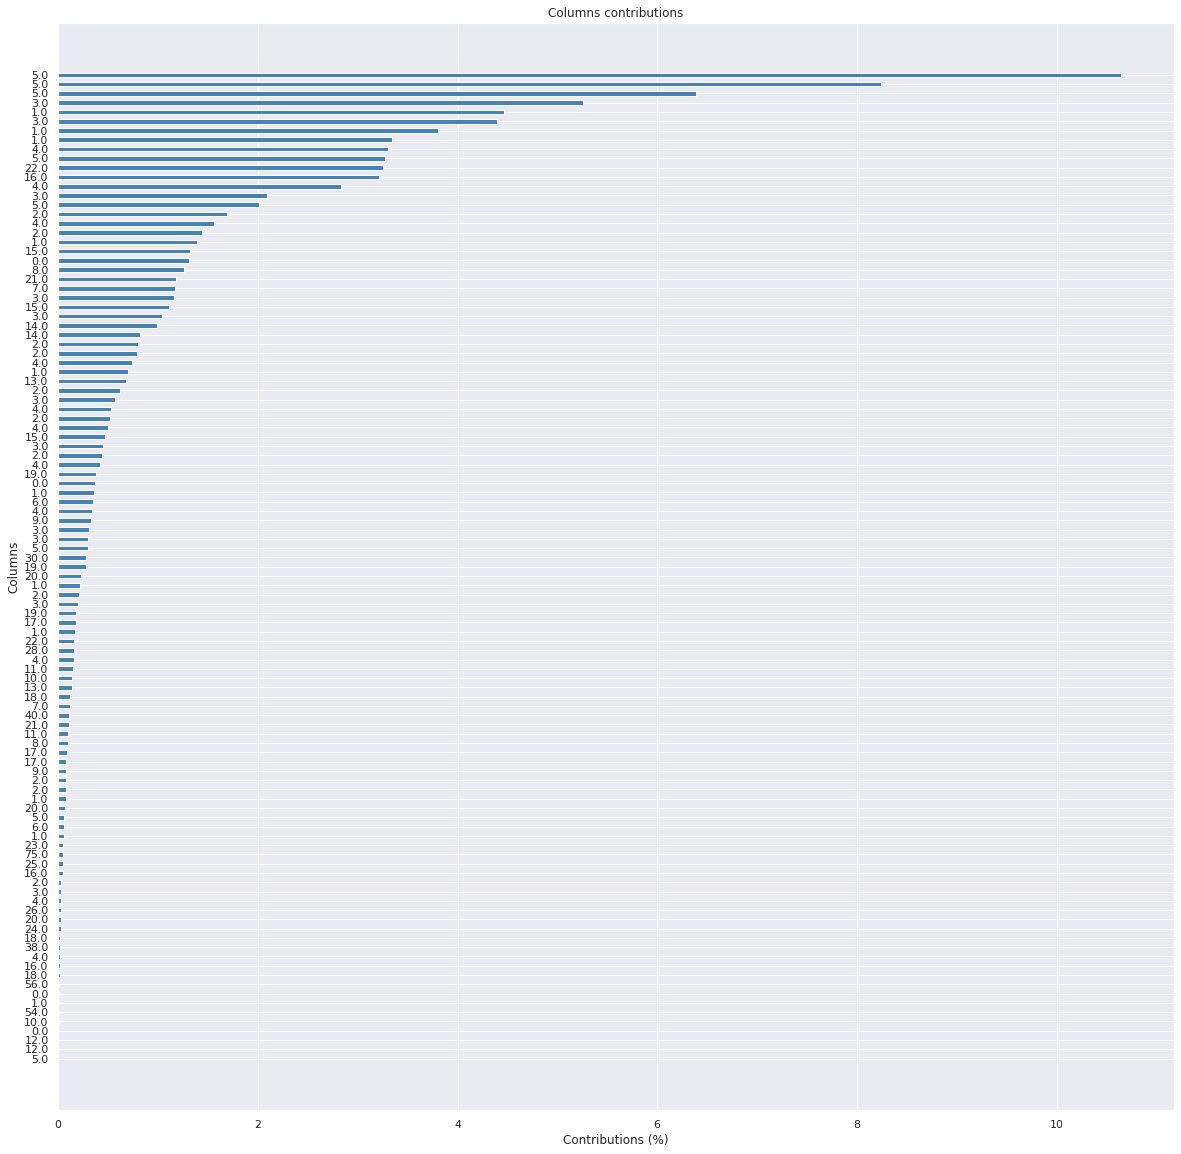

In [ ]:
#ou bien graphiquement
acm.plot_col_contrib(num_axis=1,figsize=(20, 20))

In [ ]:
#affichage des COS2
#print(pd.DataFrame(acm.col_cos2_[:,:2],index=X.columns,columns=['Cos2.F1','Cos2.F2']))
#affichage des COS2 cumulés
#print(pd.DataFrame(numpy.cumsum(acm.col_cos2_[:,:2],axis=1),index=X.columns,columns=['Cos2.F1','Cum(Cos2).F2']))

### KNN


In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline


In [ ]:
df.head(5)

In [ ]:
#conversion des données en une matrice

X = df[['age', 'Medu','goout', 'traveltime', 'absences', 'health']] .values.astype(float)

#normalisation des données

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

In [ ]:
#définition du label

y = df['G3'].values
y[0:5]

In [ ]:
#entrainement

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
k = 2
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


In [ ]:
#déterminons le meilleur k

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

##Analyse univariée


Text(0.5, 0, 'Grade')

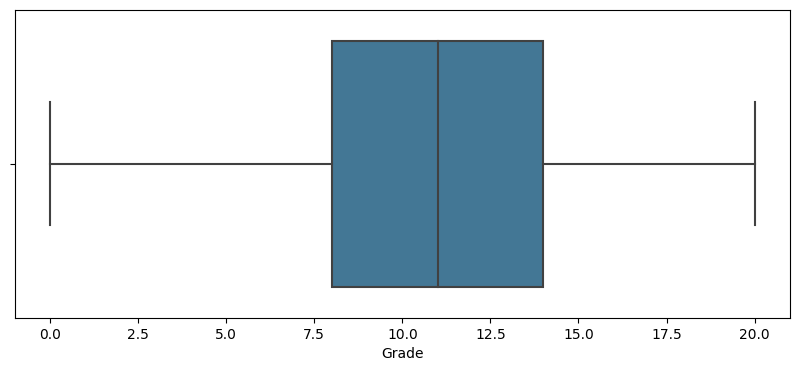

In [ ]:
plt.figure(figsize=(10, 4))
g=sns.boxplot(x=df["G3"], palette="mako")
plt.xlabel("Grade")

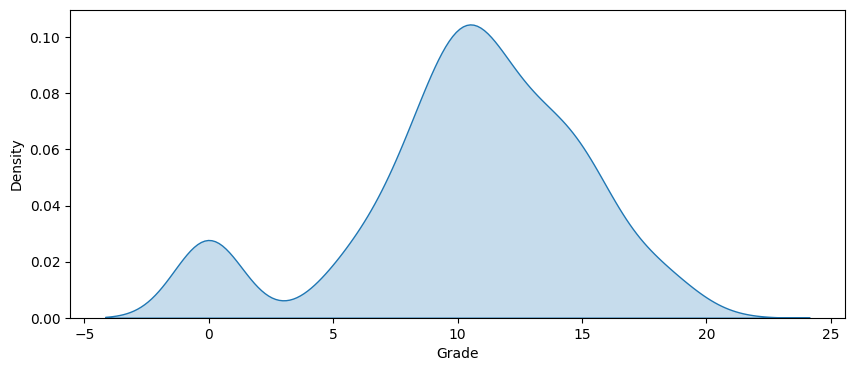

In [ ]:
plt.figure(figsize=(10, 4))
p1=sns.kdeplot(df[target], shade=True, palette="mako")
plt.xlabel("Grade")
plt.show()

In [ ]:
print(df["G3"].mean())
print(df["G3"].median())

10.415189873417722
11.0


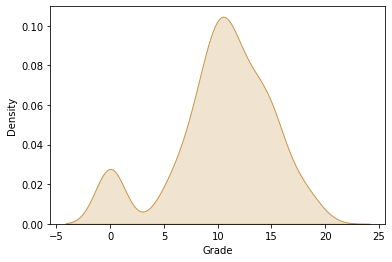

In [ ]:
p1=sns.kdeplot(df[target], shade=True, color="#C69749")
plt.xlabel("Grade")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


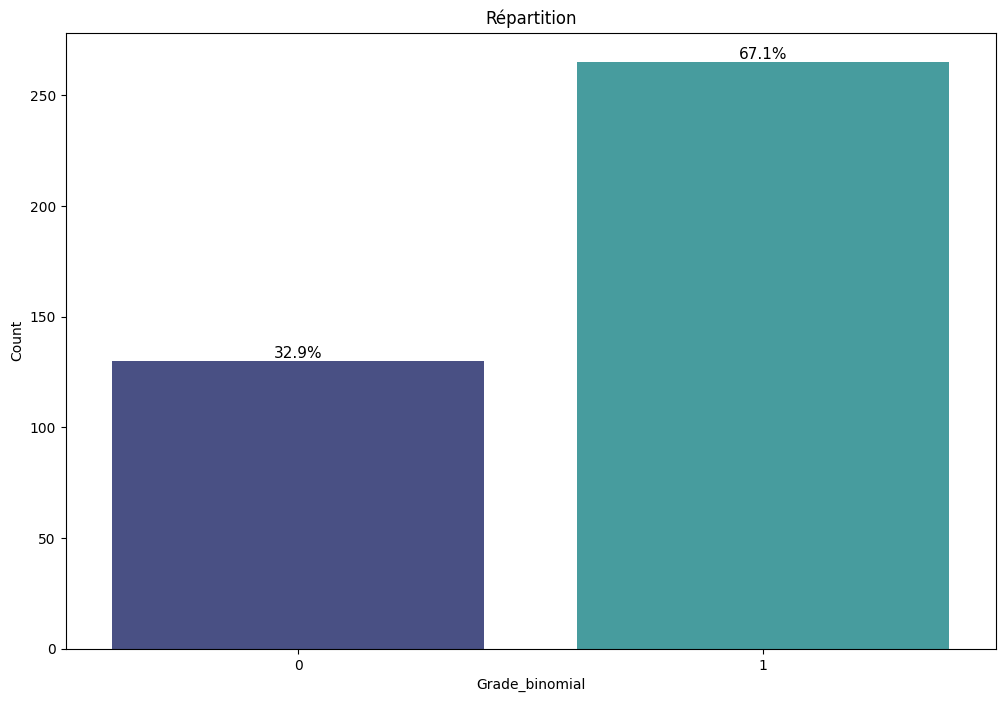

In [ ]:
def percent(plot, ax):
    total = len(plot)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/395)

        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
    plt.show()

plt.figure(figsize=(12, 8))
ax3 = sns.countplot(df["Grade_binomial"],palette="mako")
ax3.set(xlabel="Grade_binomial", ylabel='Count')
plt.title("Répartition")
percent(df["Grade_binomial"],ax3)
plt.show()


In [ ]:
#Tableau de fréquences,,moyenne, écart-type, médiane,
df.describe().T


count       mean       std   min   25%   50%   75%   max
age             395.0  16.696203  1.276043  15.0  16.0  17.0  18.0  22.0
Medu            395.0   2.749367  1.094735   0.0   2.0   3.0   4.0   4.0
traveltime      395.0   1.448101  0.697505   1.0   1.0   1.0   2.0   4.0
studytime       395.0   2.035443  0.839240   1.0   1.0   2.0   2.0   4.0
failures        395.0   0.334177  0.743651   0.0   0.0   0.0   0.0   3.0
famrel          395.0   3.944304  0.896659   1.0   4.0   4.0   5.0   5.0
freetime        395.0   3.235443  0.998862   1.0   3.0   3.0   4.0   5.0
goout           395.0   3.108861  1.113278   1.0   2.0   3.0   4.0   5.0
Dalc            395.0   1.481013  0.890741   1.0   1.0   1.0   2.0   5.0
Walc            395.0   2.291139  1.287897   1.0   1.0   2.0   3.0   5.0
health          395.0   3.554430  1.390303   1.0   3.0   4.0   5.0   5.0
absences        395.0   5.708861  8.003096   0.0   0.0   4.0   8.0  75.0
G3              395.0  10.415190  4.581443   0.0   8.0  11.0  14.0  20.0
Grade_binomial  395.0   0.670886  0.470487   0.0   0.0   1.0   1.0   1.0

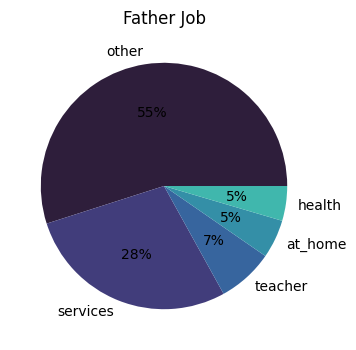

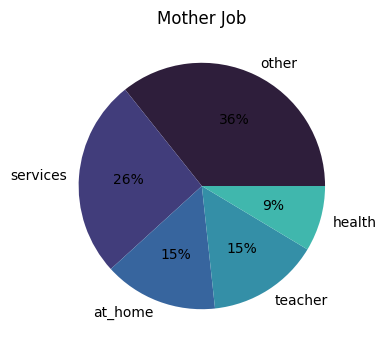

In [ ]:
palette_color = sns.color_palette('mako')
plt.figure(figsize=(10, 4))
plt.pie(df['Fjob'].value_counts().values, labels=df['Fjob'].value_counts().index,autopct='%.0f%%',colors=palette_color)
plt.title("Father Job")
plt.show()

plt.figure(figsize=(10, 4))
plt.pie(df['Mjob'].value_counts().values, labels=df['Mjob'].value_counts().index,autopct='%.0f%%',colors=palette_color)
plt.title("Mother Job")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


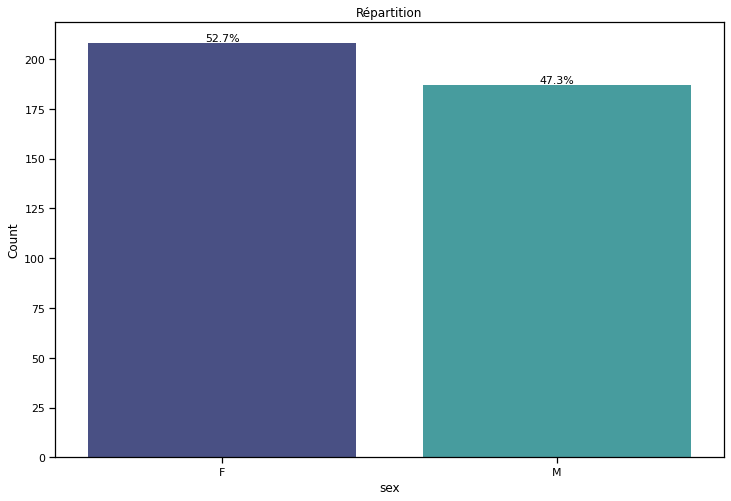

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


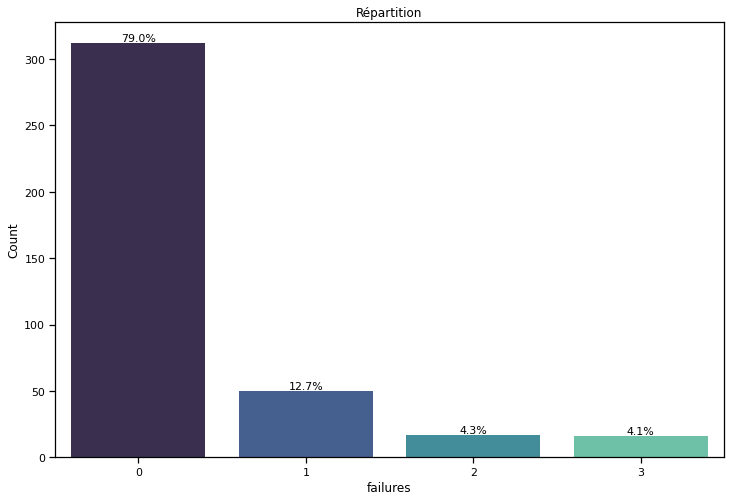

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


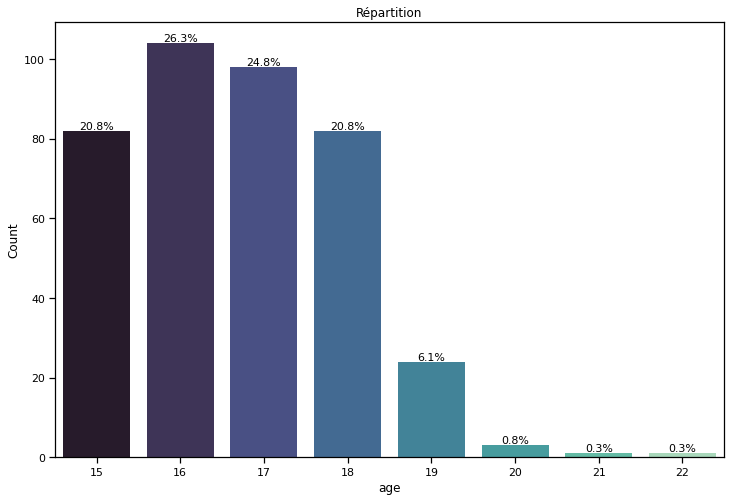

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


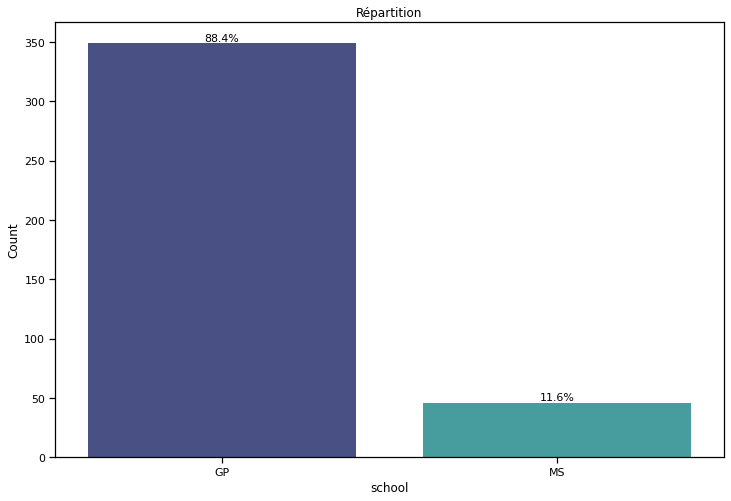

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


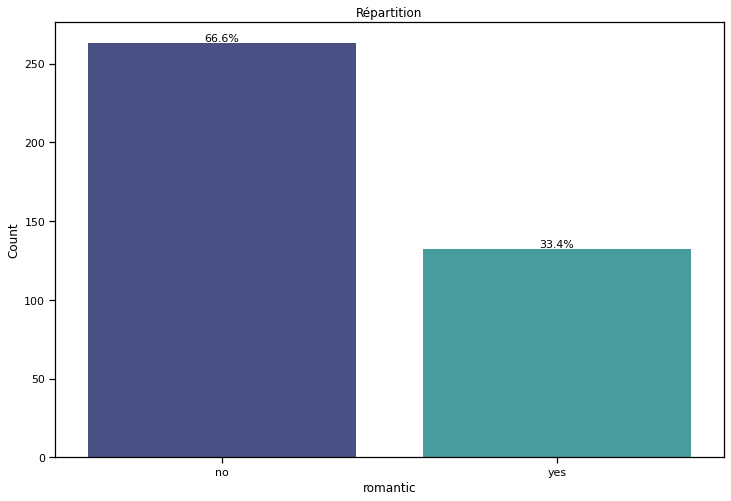

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


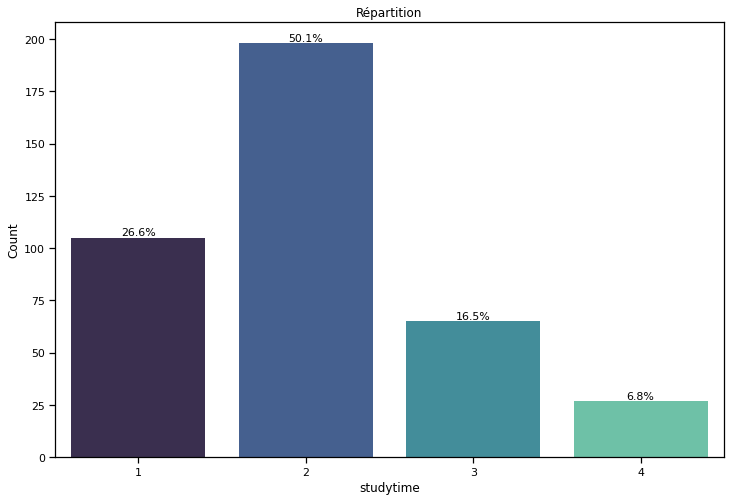

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


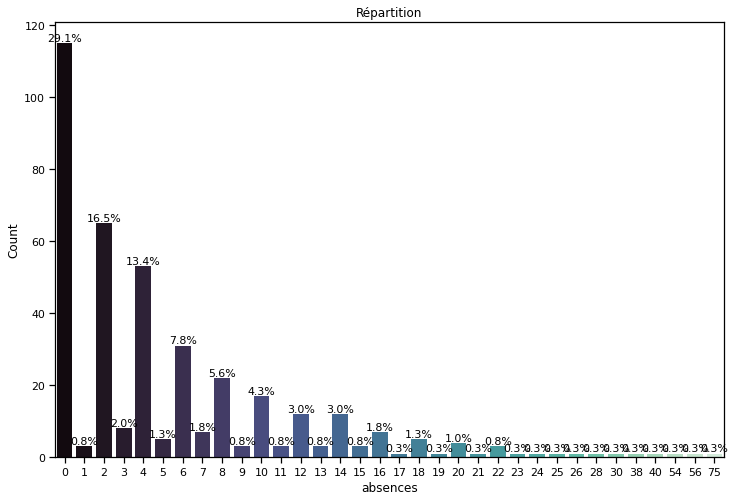

In [ ]:
def percent(plot, ax):
    total = len(plot)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/395)

        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
    plt.show()
var=["sex","failures","age","school","romantic", "studytime","absences"]
for i in var:
  plt.figure(figsize=(12, 8))
  ax3 = sns.countplot(df[i],palette="mako")
  ax3.set(xlabel=i, ylabel='Count')
  plt.title("Répartition")
  percent(df[i],ax3)
  plt.show()

In [ ]:
df["alcool_con"]=(df['Dalc']+df['Walc'])/2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Consumption')

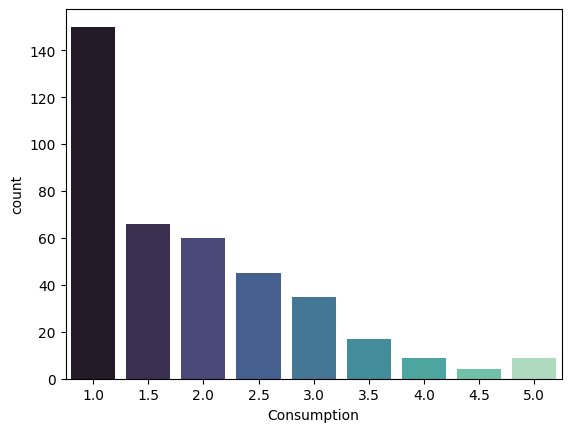

In [ ]:
sns.countplot(df["alcool_con"], palette="mako")
plt.xlabel("Consumption")

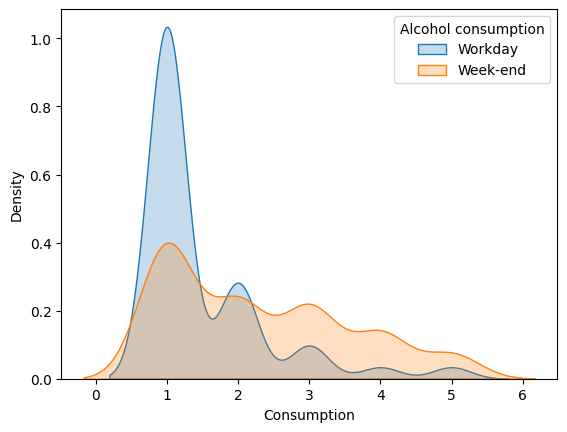

In [ ]:
# Plot 2 variables on Density Graph
p1=sns.kdeplot(df['Dalc'], shade=True, palette="mako")
p1=sns.kdeplot(df['Walc'], shade=True, palette="mako")
plt.legend(title='Alcohol consumption', loc='upper right', labels=["Workday","Week-end"])
plt.xlabel("Consumption")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Failures')

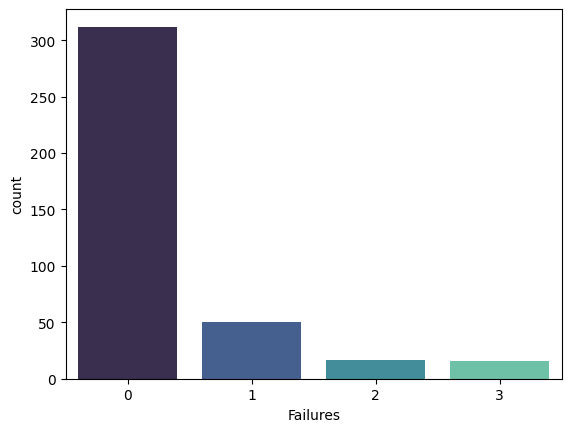

In [ ]:
sns.countplot(df['failures'], palette="mako")
plt.xlabel("Failures")

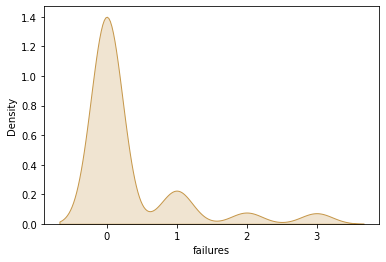

In [ ]:

p1=sns.kdeplot(df['failures'], shade=True, color="#C69749")
#plt.legend(title='Alcohol consumption', loc='upper right', labels=["Workday","Week-end"])
plt.show()

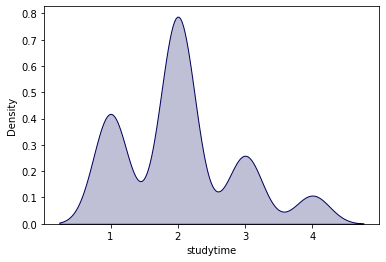

In [ ]:
p1=sns.kdeplot(df['studytime'], shade=True, color="#00005C")
#plt.legend(title='Alcohol consumption', loc='upper right', labels=["Workday","Week-end"])
plt.show()

##Regression linéaire simple


Les coeff du modèle linaires sont:
Coefficients: 
 [0.91761344]
7.817031605040279
Performance du modèle sur la base d'apprentissage:
L'erreur quadratique moyenne est 4.474910021320534
Le score R2 est 0.04664219739001607


La performance du modèle sur la base de test:
L'erreur quadratique moyenne est 4.435745730452069
Le score R2 est 0.04043916953723081


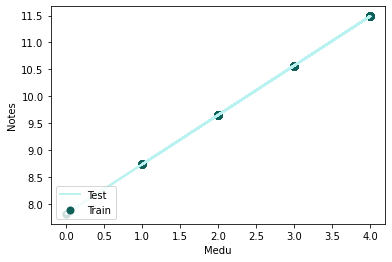

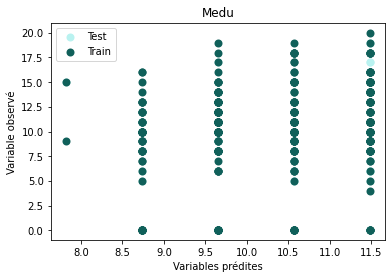

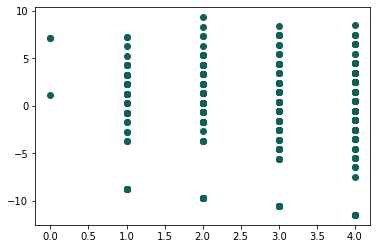

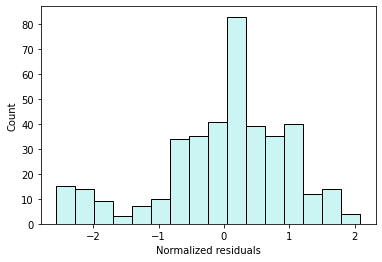

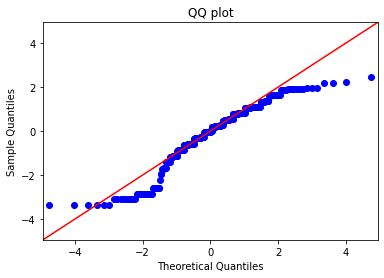

Les coeff du modèle linaires sont:
Coefficients: 
 [-0.52848951]
19.174803708523505
Performance du modèle sur la base d'apprentissage:
L'erreur quadratique moyenne est 4.533795716601535
Le score R2 est 0.02138649103446233


La performance du modèle sur la base de test:
L'erreur quadratique moyenne est 4.446388378713699
Le score R2 est 0.035829112905774396


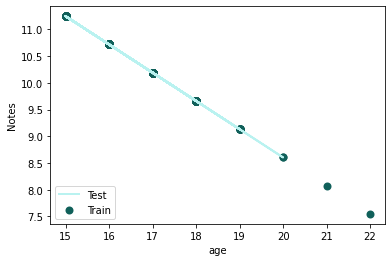

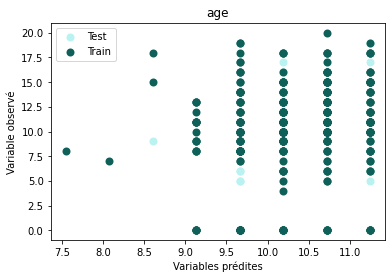

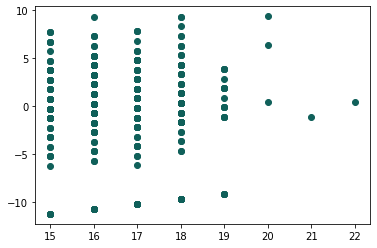

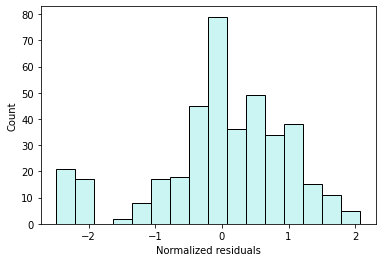

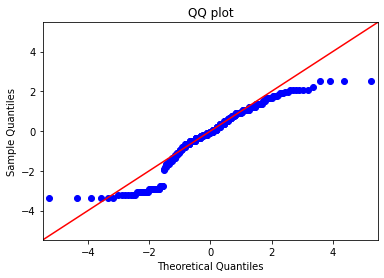

Les coeff du modèle linaires sont:
Coefficients: 
 [4.23378076]
6.33333333333333
Performance du modèle sur la base d'apprentissage:
L'erreur quadratique moyenne est 4.47678884341037
Le score R2 est 0.045841481526568306


La performance du modèle sur la base de test:
L'erreur quadratique moyenne est 4.592785631818208
Le score R2 est -0.028706717135272175


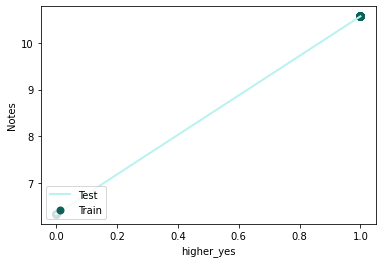

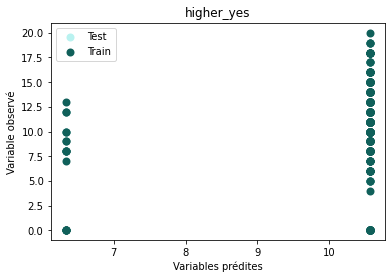

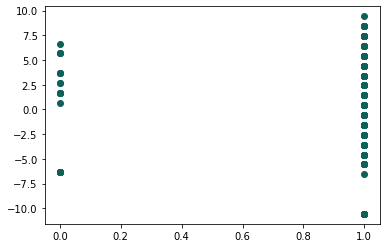

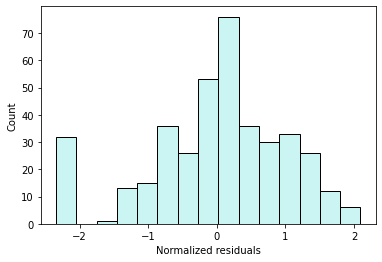

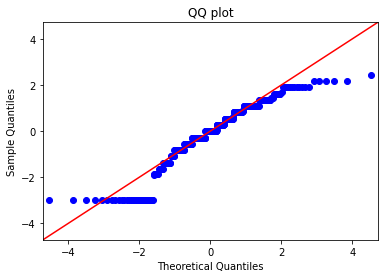

Les coeff du modèle linaires sont:
Coefficients: 
 [-2.33245451]
11.108354994430004
Performance du modèle sur la base d'apprentissage:
L'erreur quadratique moyenne est 4.250896572529238
Le score R2 est 0.13970304114824805


La performance du modèle sur la base de test:
L'erreur quadratique moyenne est 4.3446079181111905
Le score R2 est 0.07946479150473307


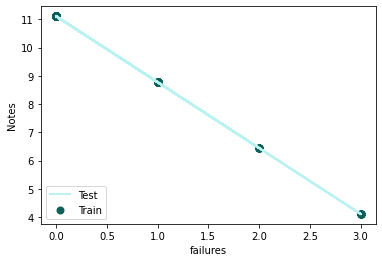

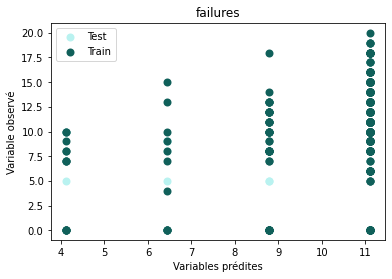

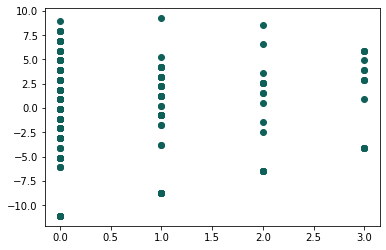

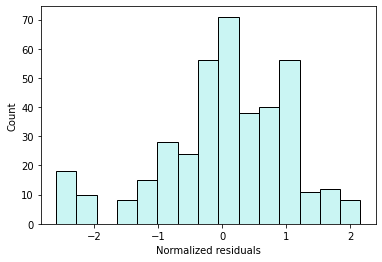

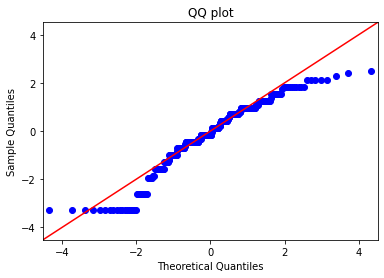

In [ ]:
var=["Medu","age","higher_yes","failures"]
for i in var:
  X=newdf[i]
  Y=newdf[target]
  X = np.asarray(X).reshape(-1, 1)
  Y=np.asarray(Y)

  #base d'apprentissage et base de test
  from sklearn.model_selection import train_test_split

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

  #entrainement du modèle
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error

  lmodellineaire = LinearRegression()
  lmodellineaire.fit(X_train, Y_train)
  print("Les coeff du modèle linaires sont:")
  print("Coefficients: \n", lmodellineaire.coef_)
  y=lmodellineaire.intercept_
  print(y)


  # Evaluation du training set
  from sklearn.metrics import r2_score
  y_train_predict = lmodellineaire.predict(X_train)
  rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
  r2 = r2_score(Y_train, y_train_predict)

  print("Performance du modèle sur la base d'apprentissage:")
  print("L'erreur quadratique moyenne est {}".format(rmse))
  print("Le score R2 est {}".format(r2))
  print('\n')


  # model evaluation for testing set
  y_test_predict = lmodellineaire.predict(X_test)
  rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
  r2 = r2_score(Y_test, y_test_predict)

  print("La performance du modèle sur la base de test:")
  print("L'erreur quadratique moyenne est {}".format(rmse))
  print('Le score R2 est {}'.format(r2))

  fig = plt.figure()
  plt.scatter(X_train,y_train_predict,color = '#10605a', linewidth=2.0)
  plt.plot(X_test,y_test_predict,color = '#b9f2f0', linewidth=2.0)

  plt.legend(["Test", "Train"], loc ="lower left")
  plt.ylabel('Notes')
  plt.xlabel(i)
  plt.show()
#fbcd11
#9a2424
#243844
 #77854f
 #10605a
 #004054
  plt.title(i)
  plt.scatter( y_test_predict,Y_test, color = '#b9f2f0', linewidth=2.0)
  plt.scatter( y_train_predict,Y_train ,color = '#10605a', linewidth=2.0)
  plt.ylabel('Variable observé')
  plt.xlabel('Variables prédites')
  plt.legend(["Test", "Train"])
  plt.show()

  residues = (Y - lmodellineaire.predict(X))
  residues_std = residues/math.sqrt(sum(residues**2)/(len(residues)-1))

  plt.scatter( X,residues, color="#10605a")
  plt.show()
    #Histograme
  sns.histplot(residues_std ,color='#b9f2f0')
  #plt.hist(residues_std)
  plt.ylabel('Count')
  plt.xlabel('Normalized residuals')
  plt.show()
    #QQ plot

  fig = sm.qqplot(residues_std, stats.t, fit=True,line='45')

  plt.title("QQ plot")

  plt.show()

##Etude bivariée

Corrélations

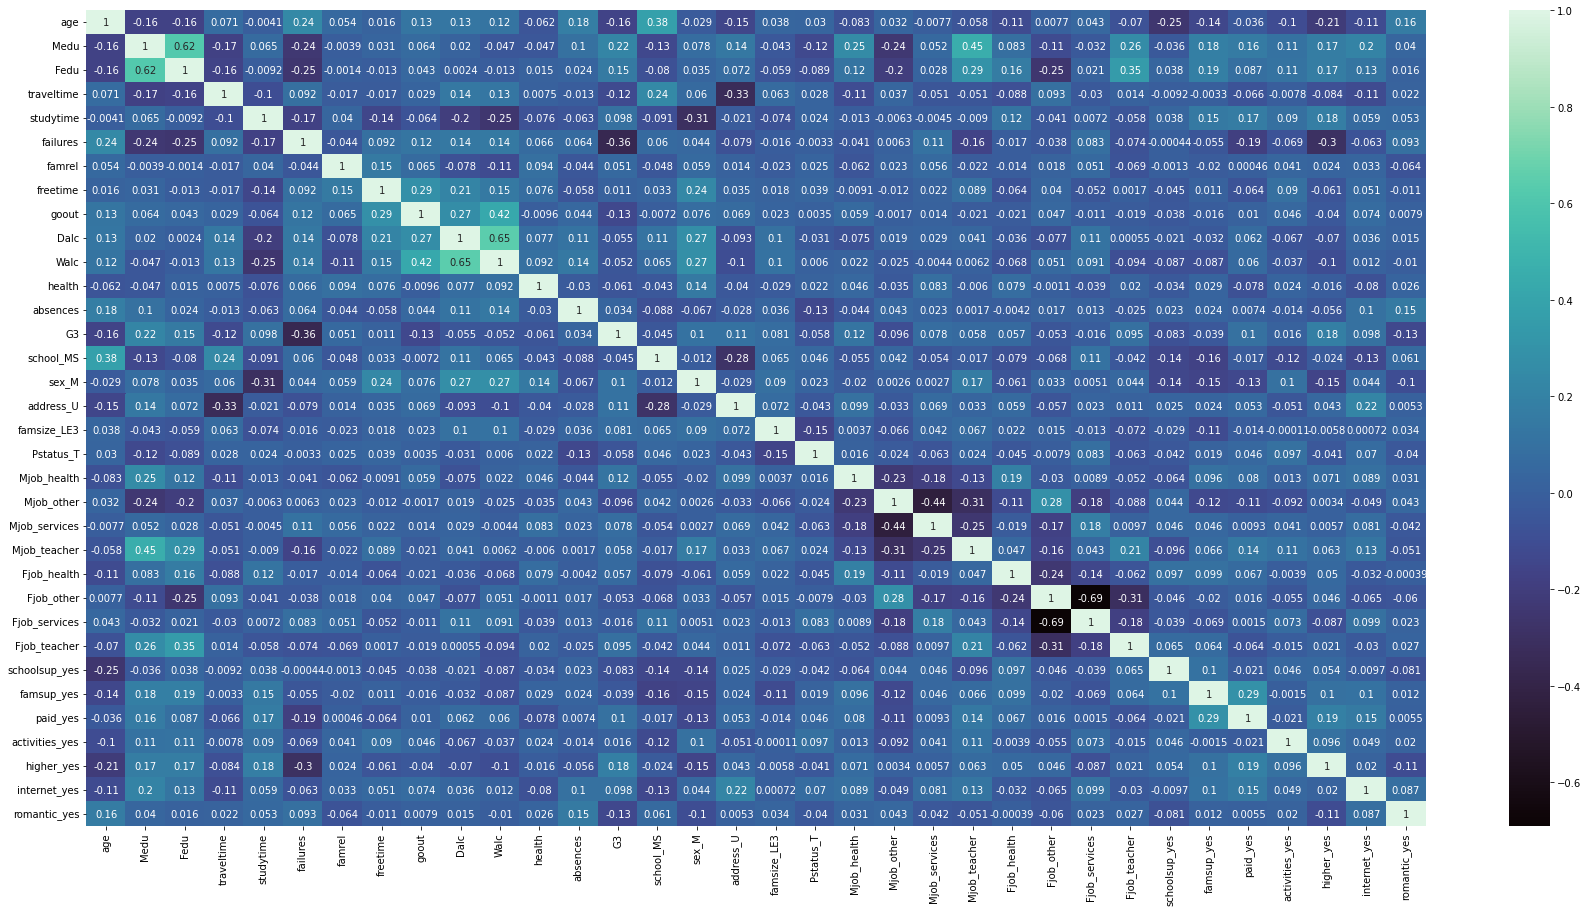

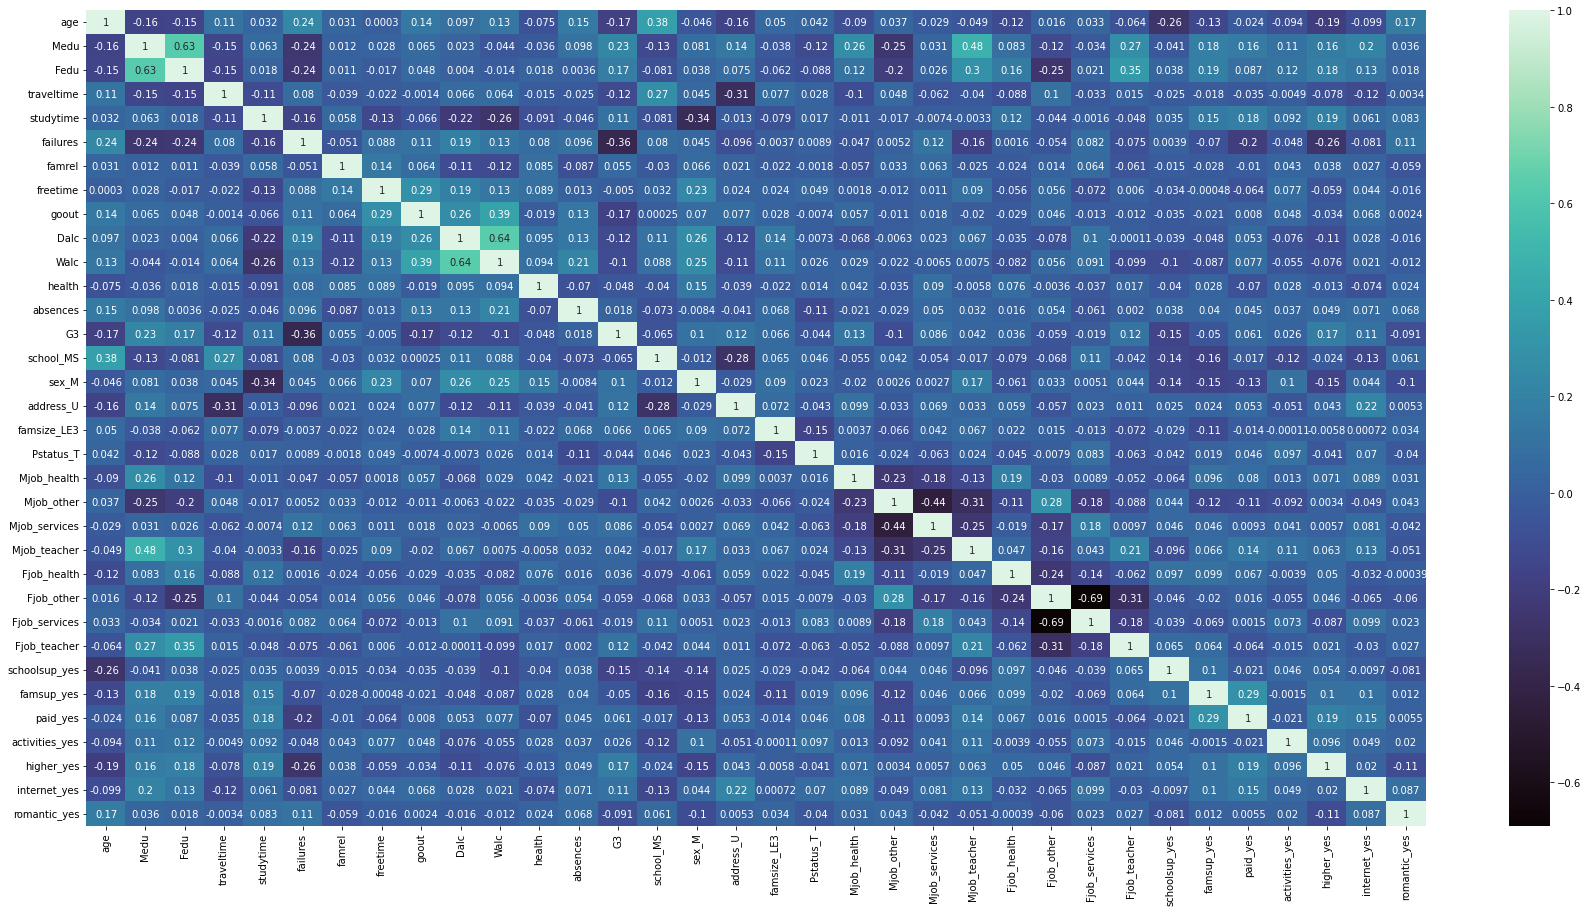

In [ ]:
#Correlation de Pearson
plt.figure(figsize=(30,15))
corrélation = newdf.corr()
sns.heatmap(corrélation, annot=True, cmap="mako")
plt.show()

#Corréation de Spearman
plt.figure(figsize=(30,15))
corrélation = newdf.corr(method='spearman')
sns.heatmap(corrélation, annot=True, cmap="mako")
plt.show()


In [ ]:
cor_target = abs(corrélation["absences"])
#On selectione les variales avec une correlation plus importante
relevant_features = cor_target[cor_target>0.1]
relevant_features

age             0.175230
Medu            0.100285
Dalc            0.111908
Walc            0.136291
absences        1.000000
Pstatus_T       0.134937
internet_yes    0.101701
romantic_yes    0.153384
Name: absences, dtype: float64

In [ ]:
colonne=df.columns.drop(target)
colonne.drop("Grade_binomial")

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Mjob',
       'Fjob', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'],
      dtype='object')

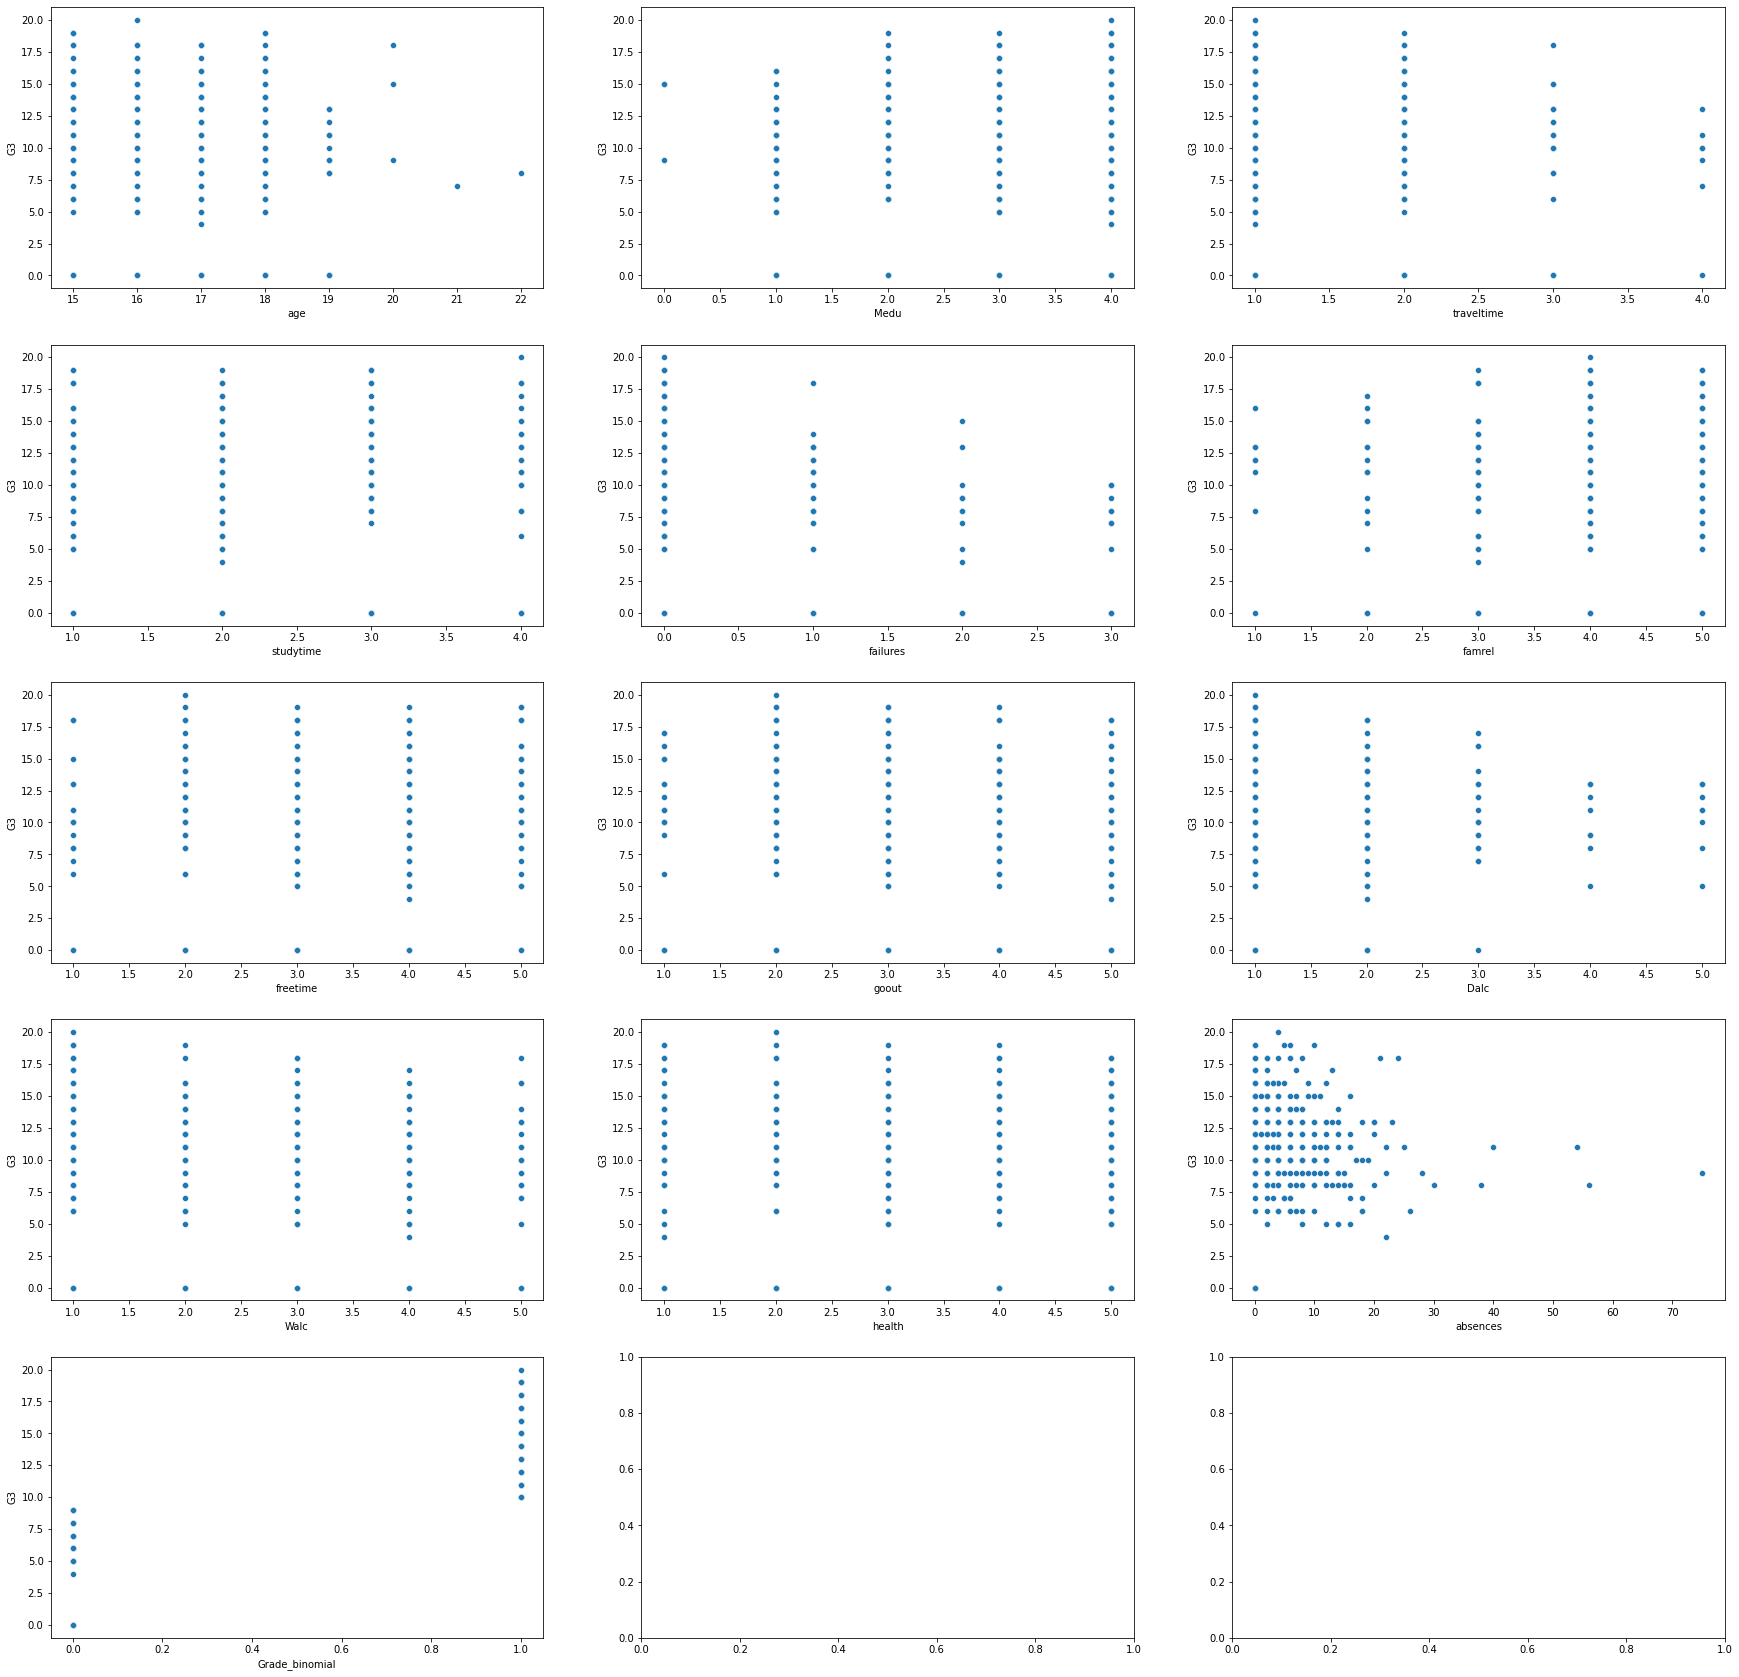

In [ ]:
i=0
n=0
fig , ax = plt.subplots(nrows = 5, ncols = 3, figsize=(30,30))

for feature in colonne:
  if i==3:
    i=0
    n=n+1
  if df[feature].dtypes==int:
    sns.scatterplot(x=feature, y=target, data=df, ax=ax[n][i],palette="mako")
    i=i+1


plt.show()


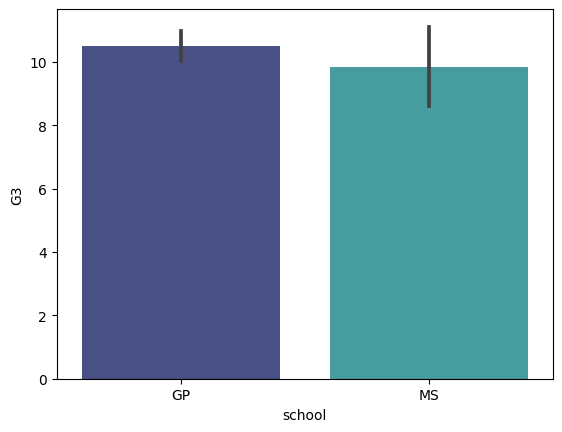

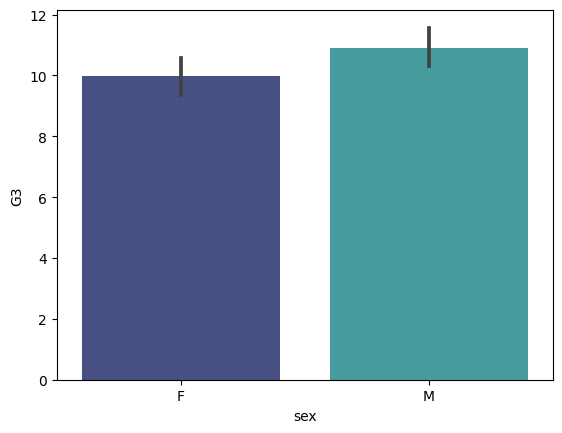

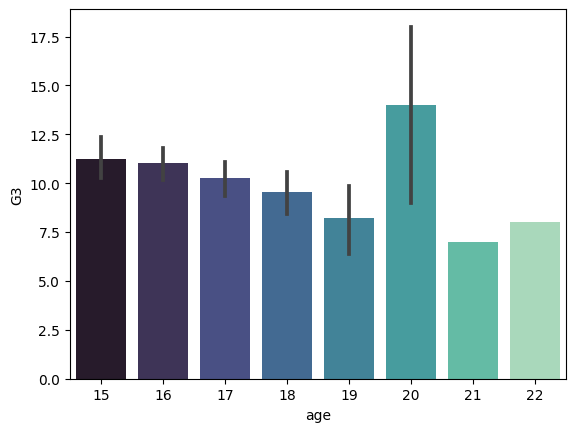

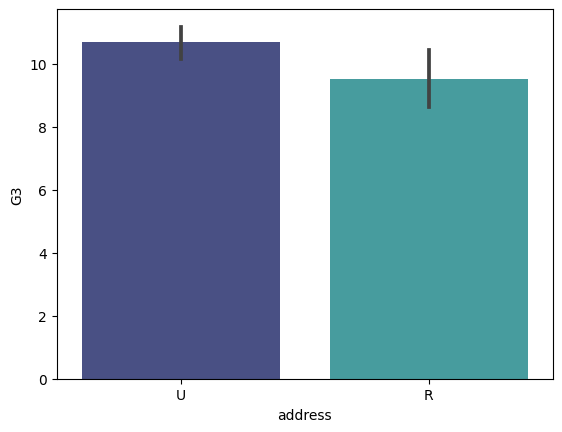

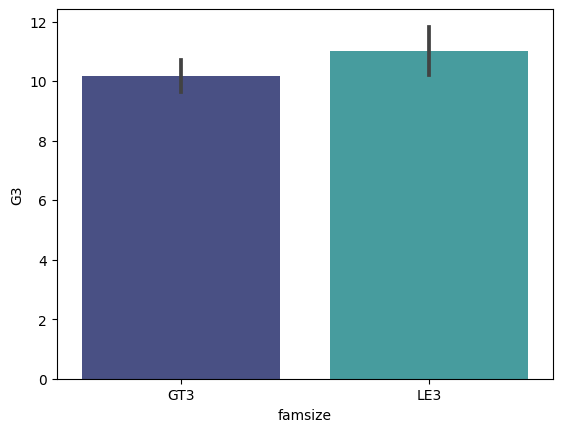

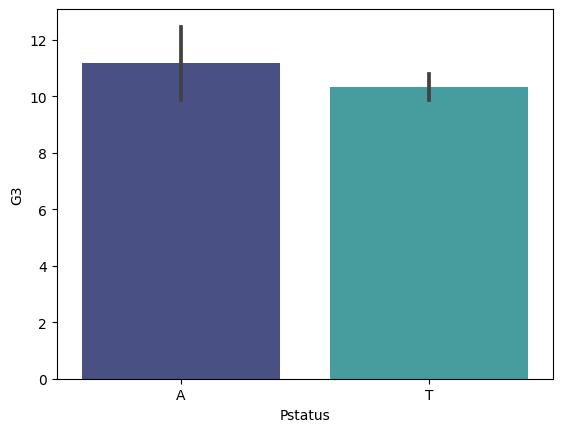

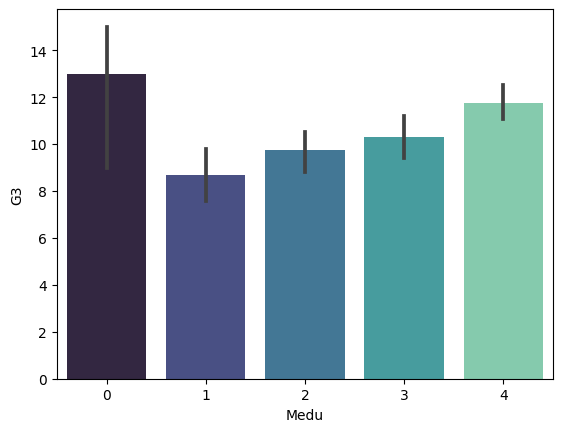

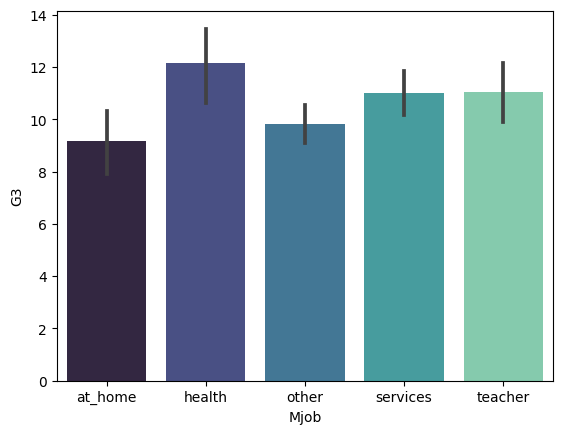

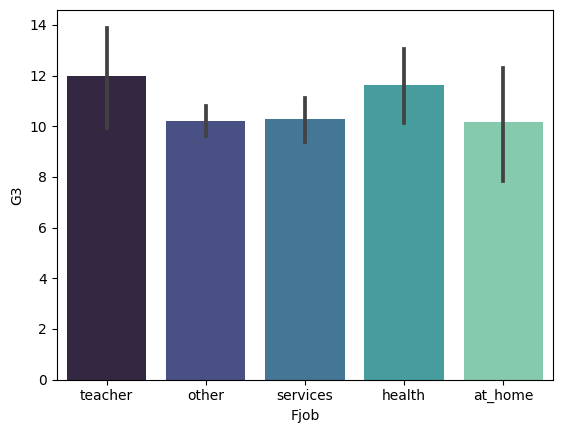

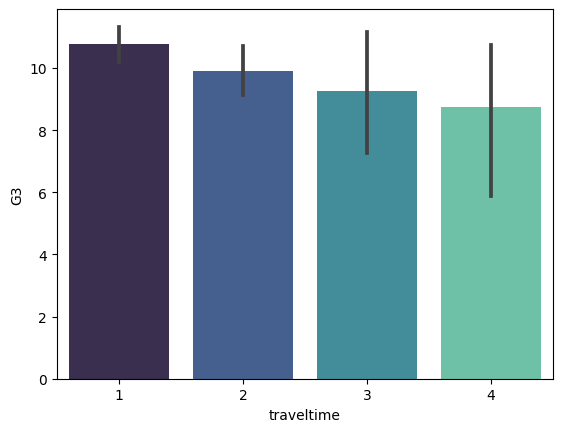

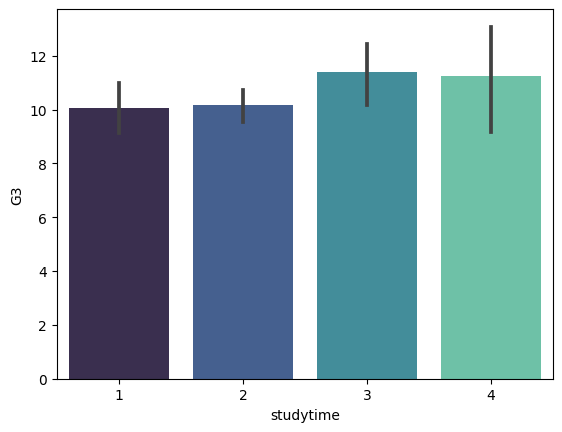

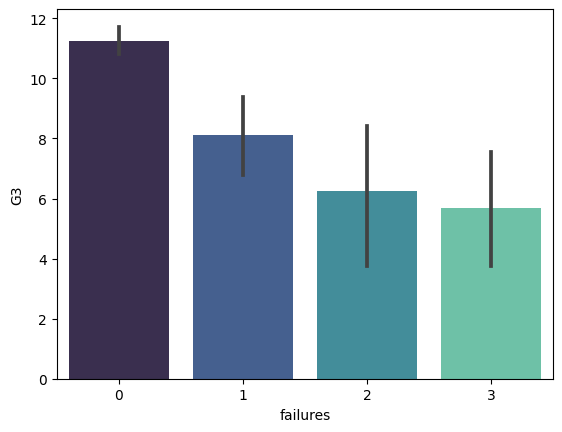

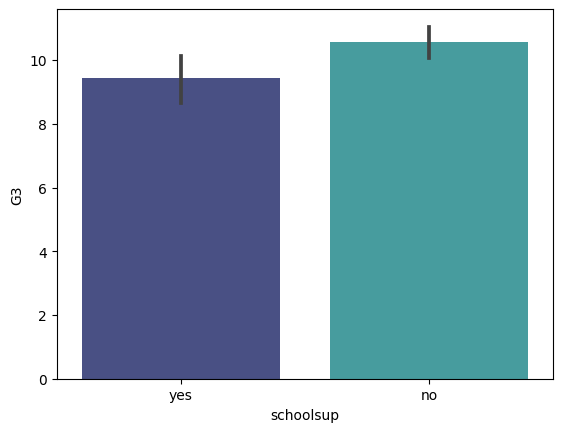

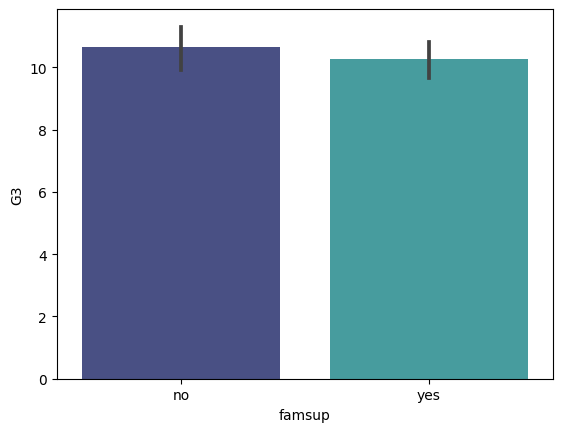

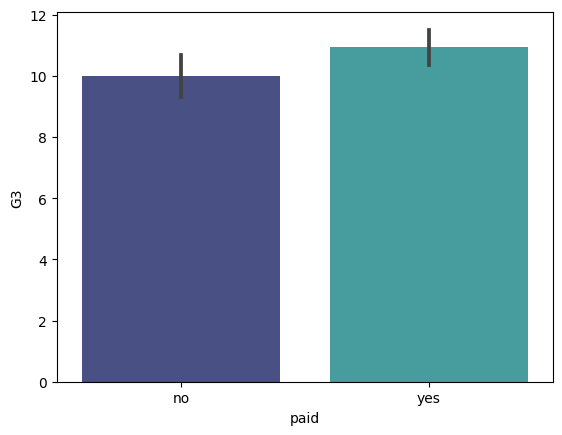

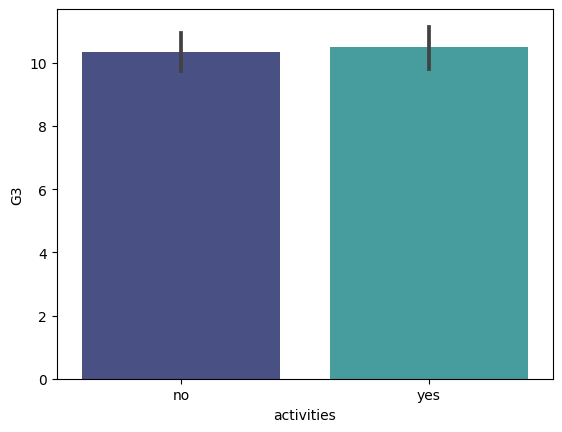

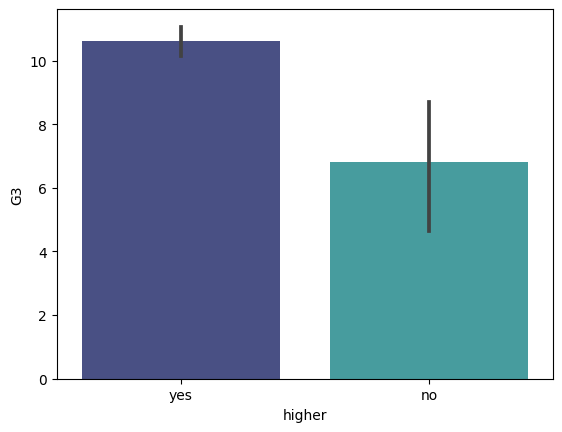

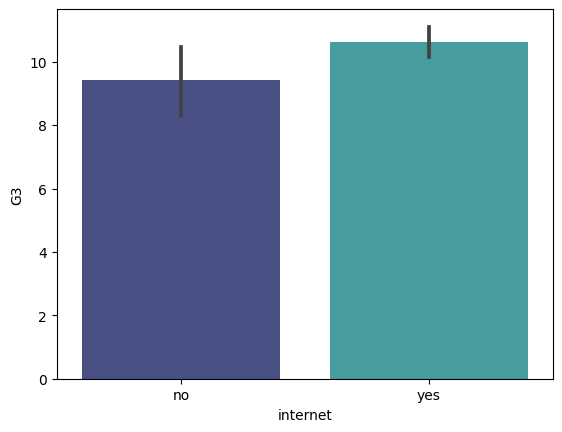

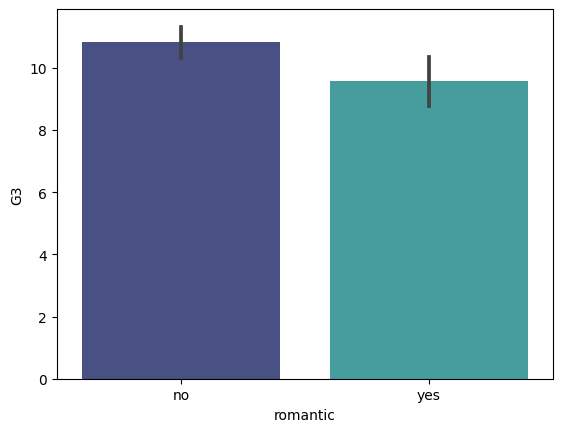

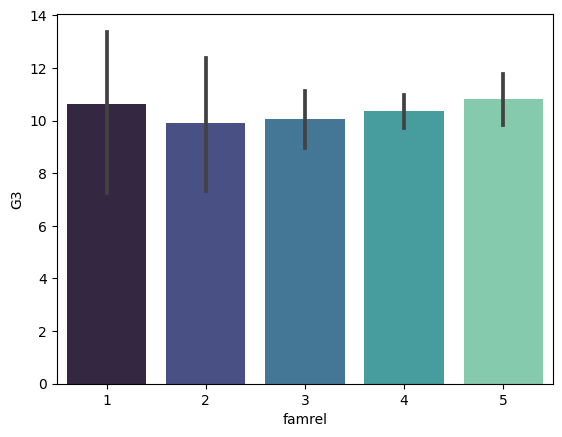

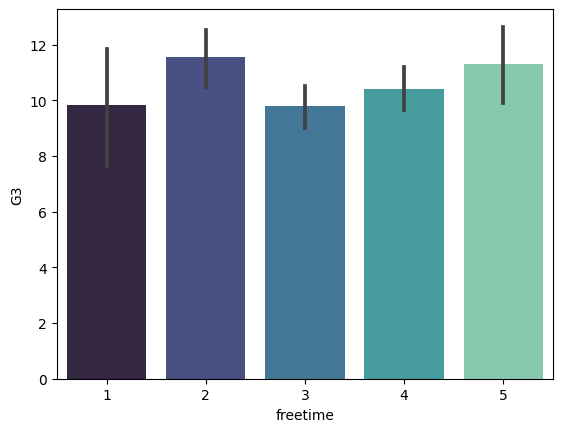

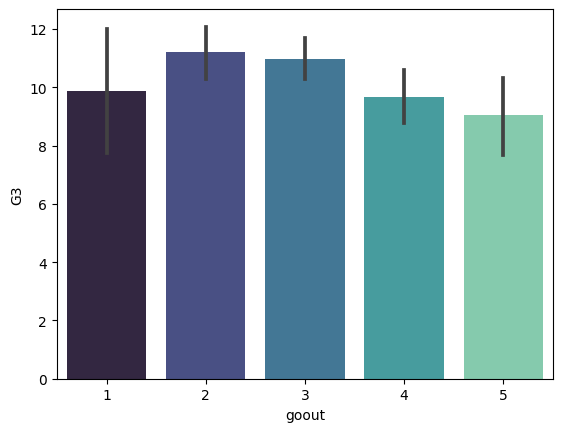

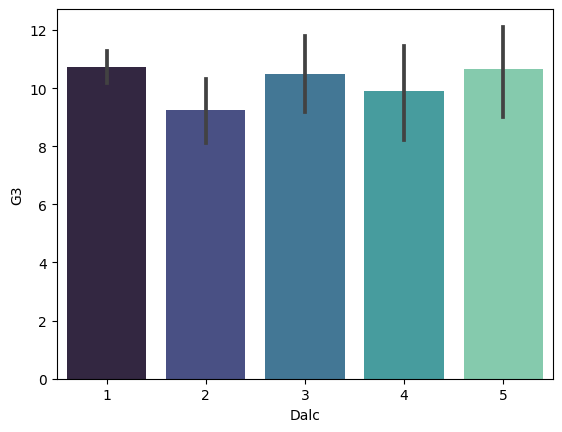

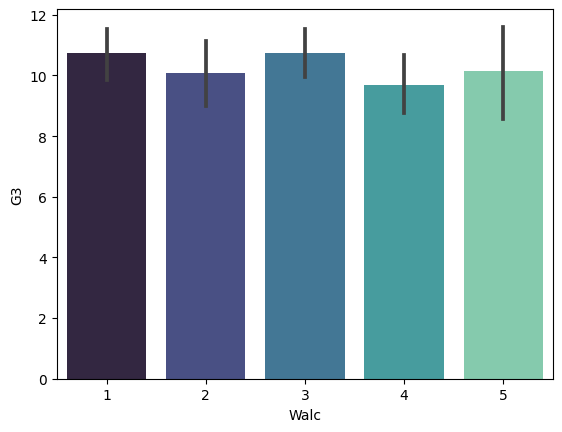

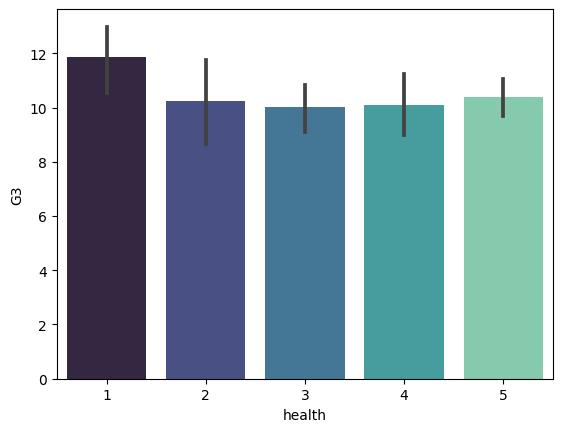

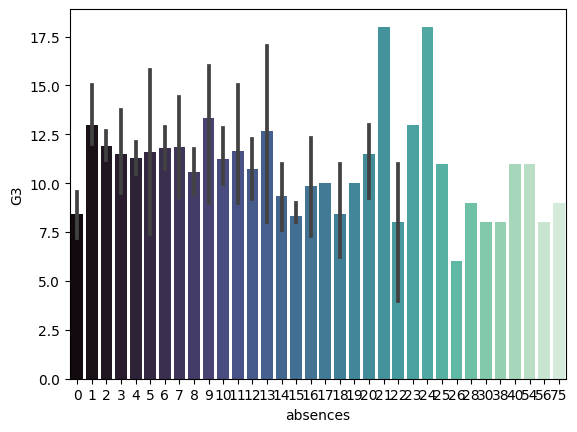

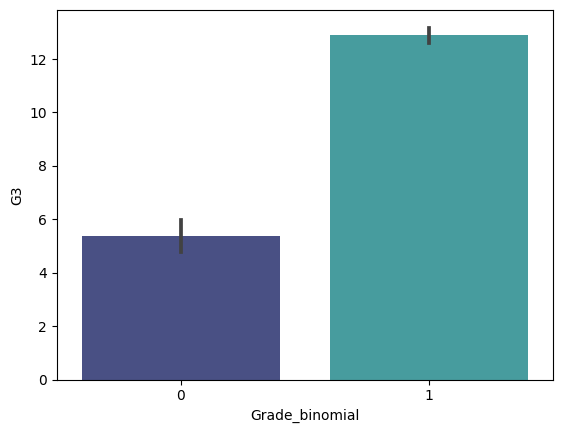

In [ ]:
i=0
n=0
#fig , ax = plt.subplots(nrows = 7, ncols = 4, figsize=(30,40))

for feature in colonne:
  if i==4:
    i=0
    n=n+1

  sns.barplot(x=feature, y=target, data=df,palette="mako")
  i=i+1

  plt.show()


plt.show()

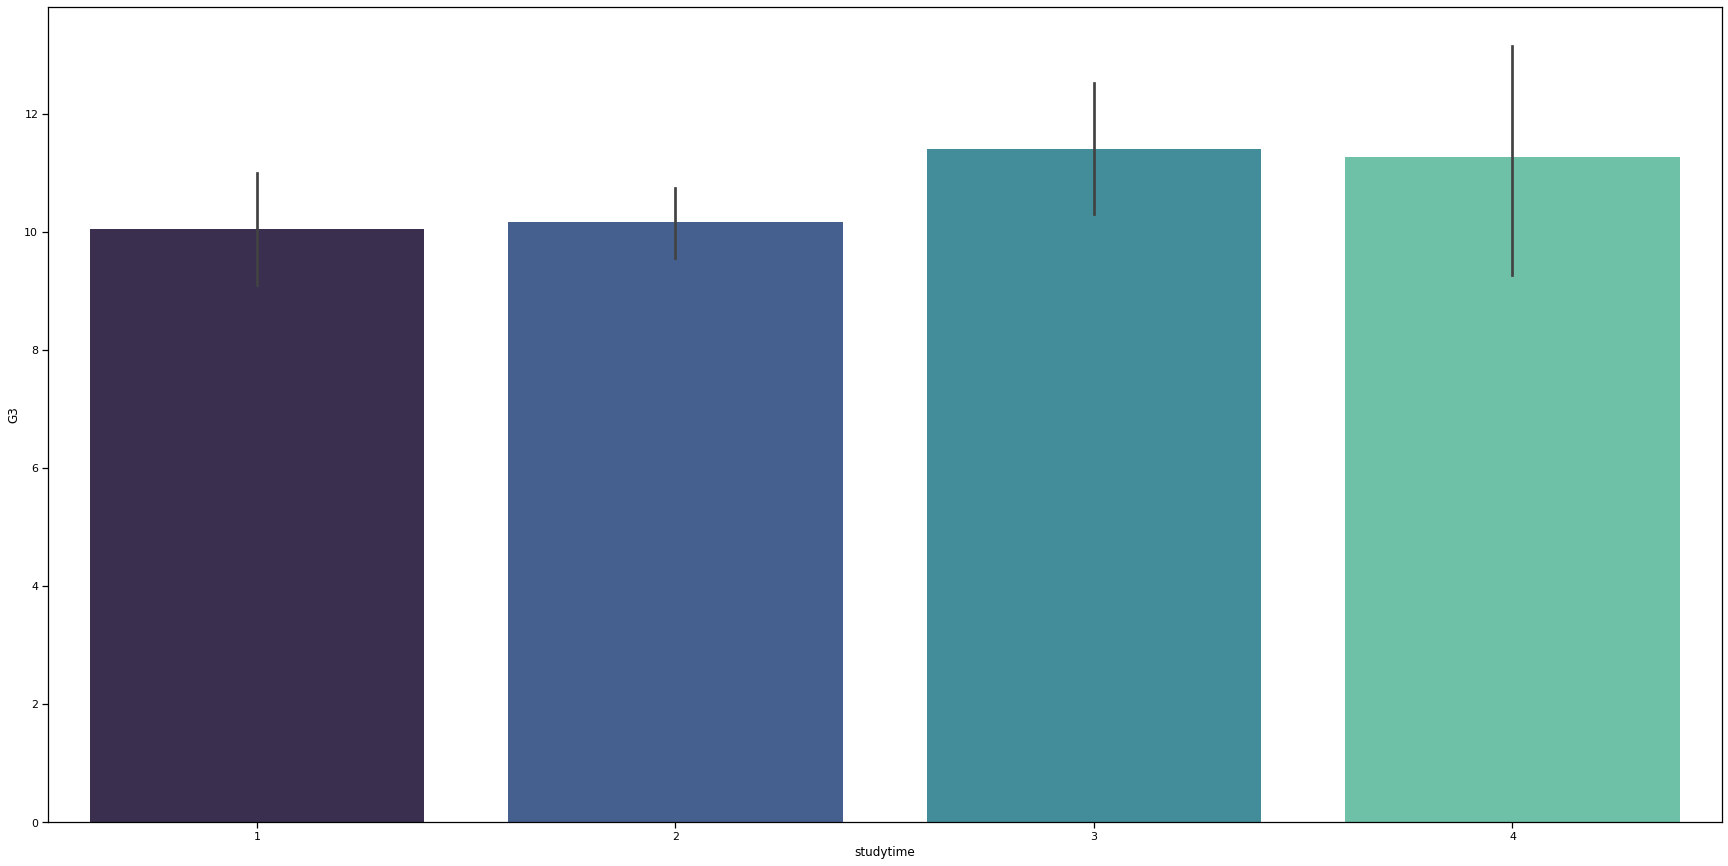

In [ ]:

plt.figure(figsize=(30,15))
sns.barplot(y=df["G3"], x=df["studytime"],palette="mako")
plt.show()

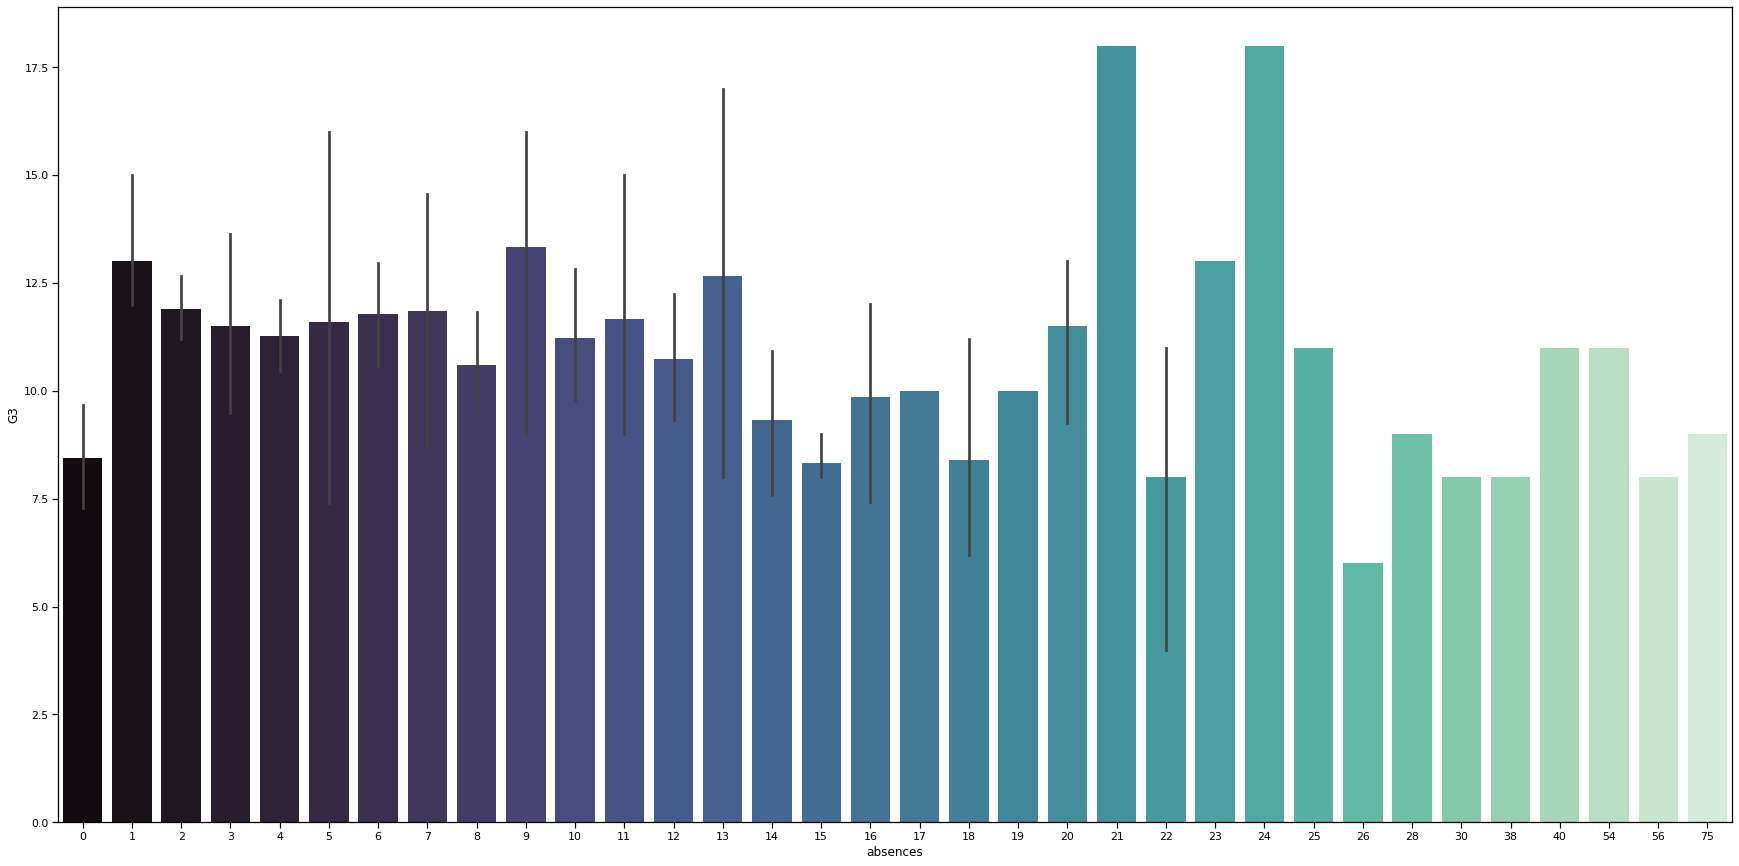

In [ ]:

plt.figure(figsize=(30,15))
sns.barplot(y=df["G3"], x=df["absences"],palette="mako")
plt.show()

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm
formula = 'G3 ~ C(Dalc)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
aov_table

df       sum_sq    mean_sq         F    PR(>F)
C(Dalc)     4.0   132.173885  33.043471  1.583605  0.177864
Residual  390.0  8137.734976  20.865987       NaN       NaN

In [ ]:
formula = 'G3 ~ C(Walc)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
aov_table

df       sum_sq    mean_sq         F   PR(>F)
C(Walc)     4.0    61.722394  15.430599  0.733162  0.56975
Residual  390.0  8208.186467  21.046632       NaN      NaN

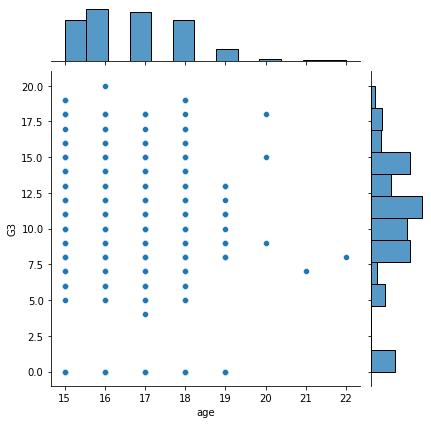

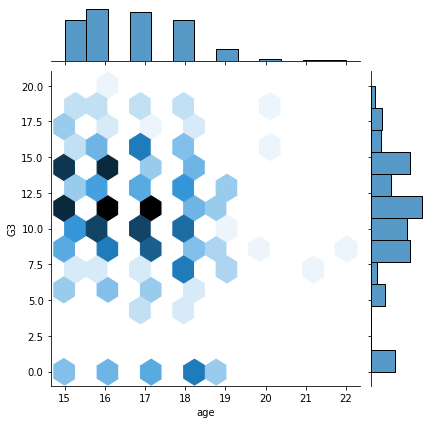

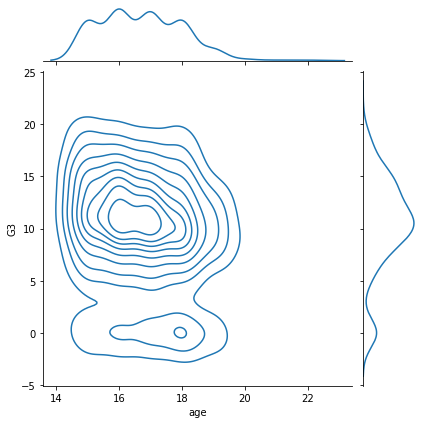

In [ ]:
X1=df["age"]
Y1=df[target]
sns.jointplot(x=X1, y=Y1, kind='scatter')
sns.jointplot(x=X1, y=Y1, kind='hex')
sns.jointplot(x=X1, y=Y1, kind='kde')

plt.show()

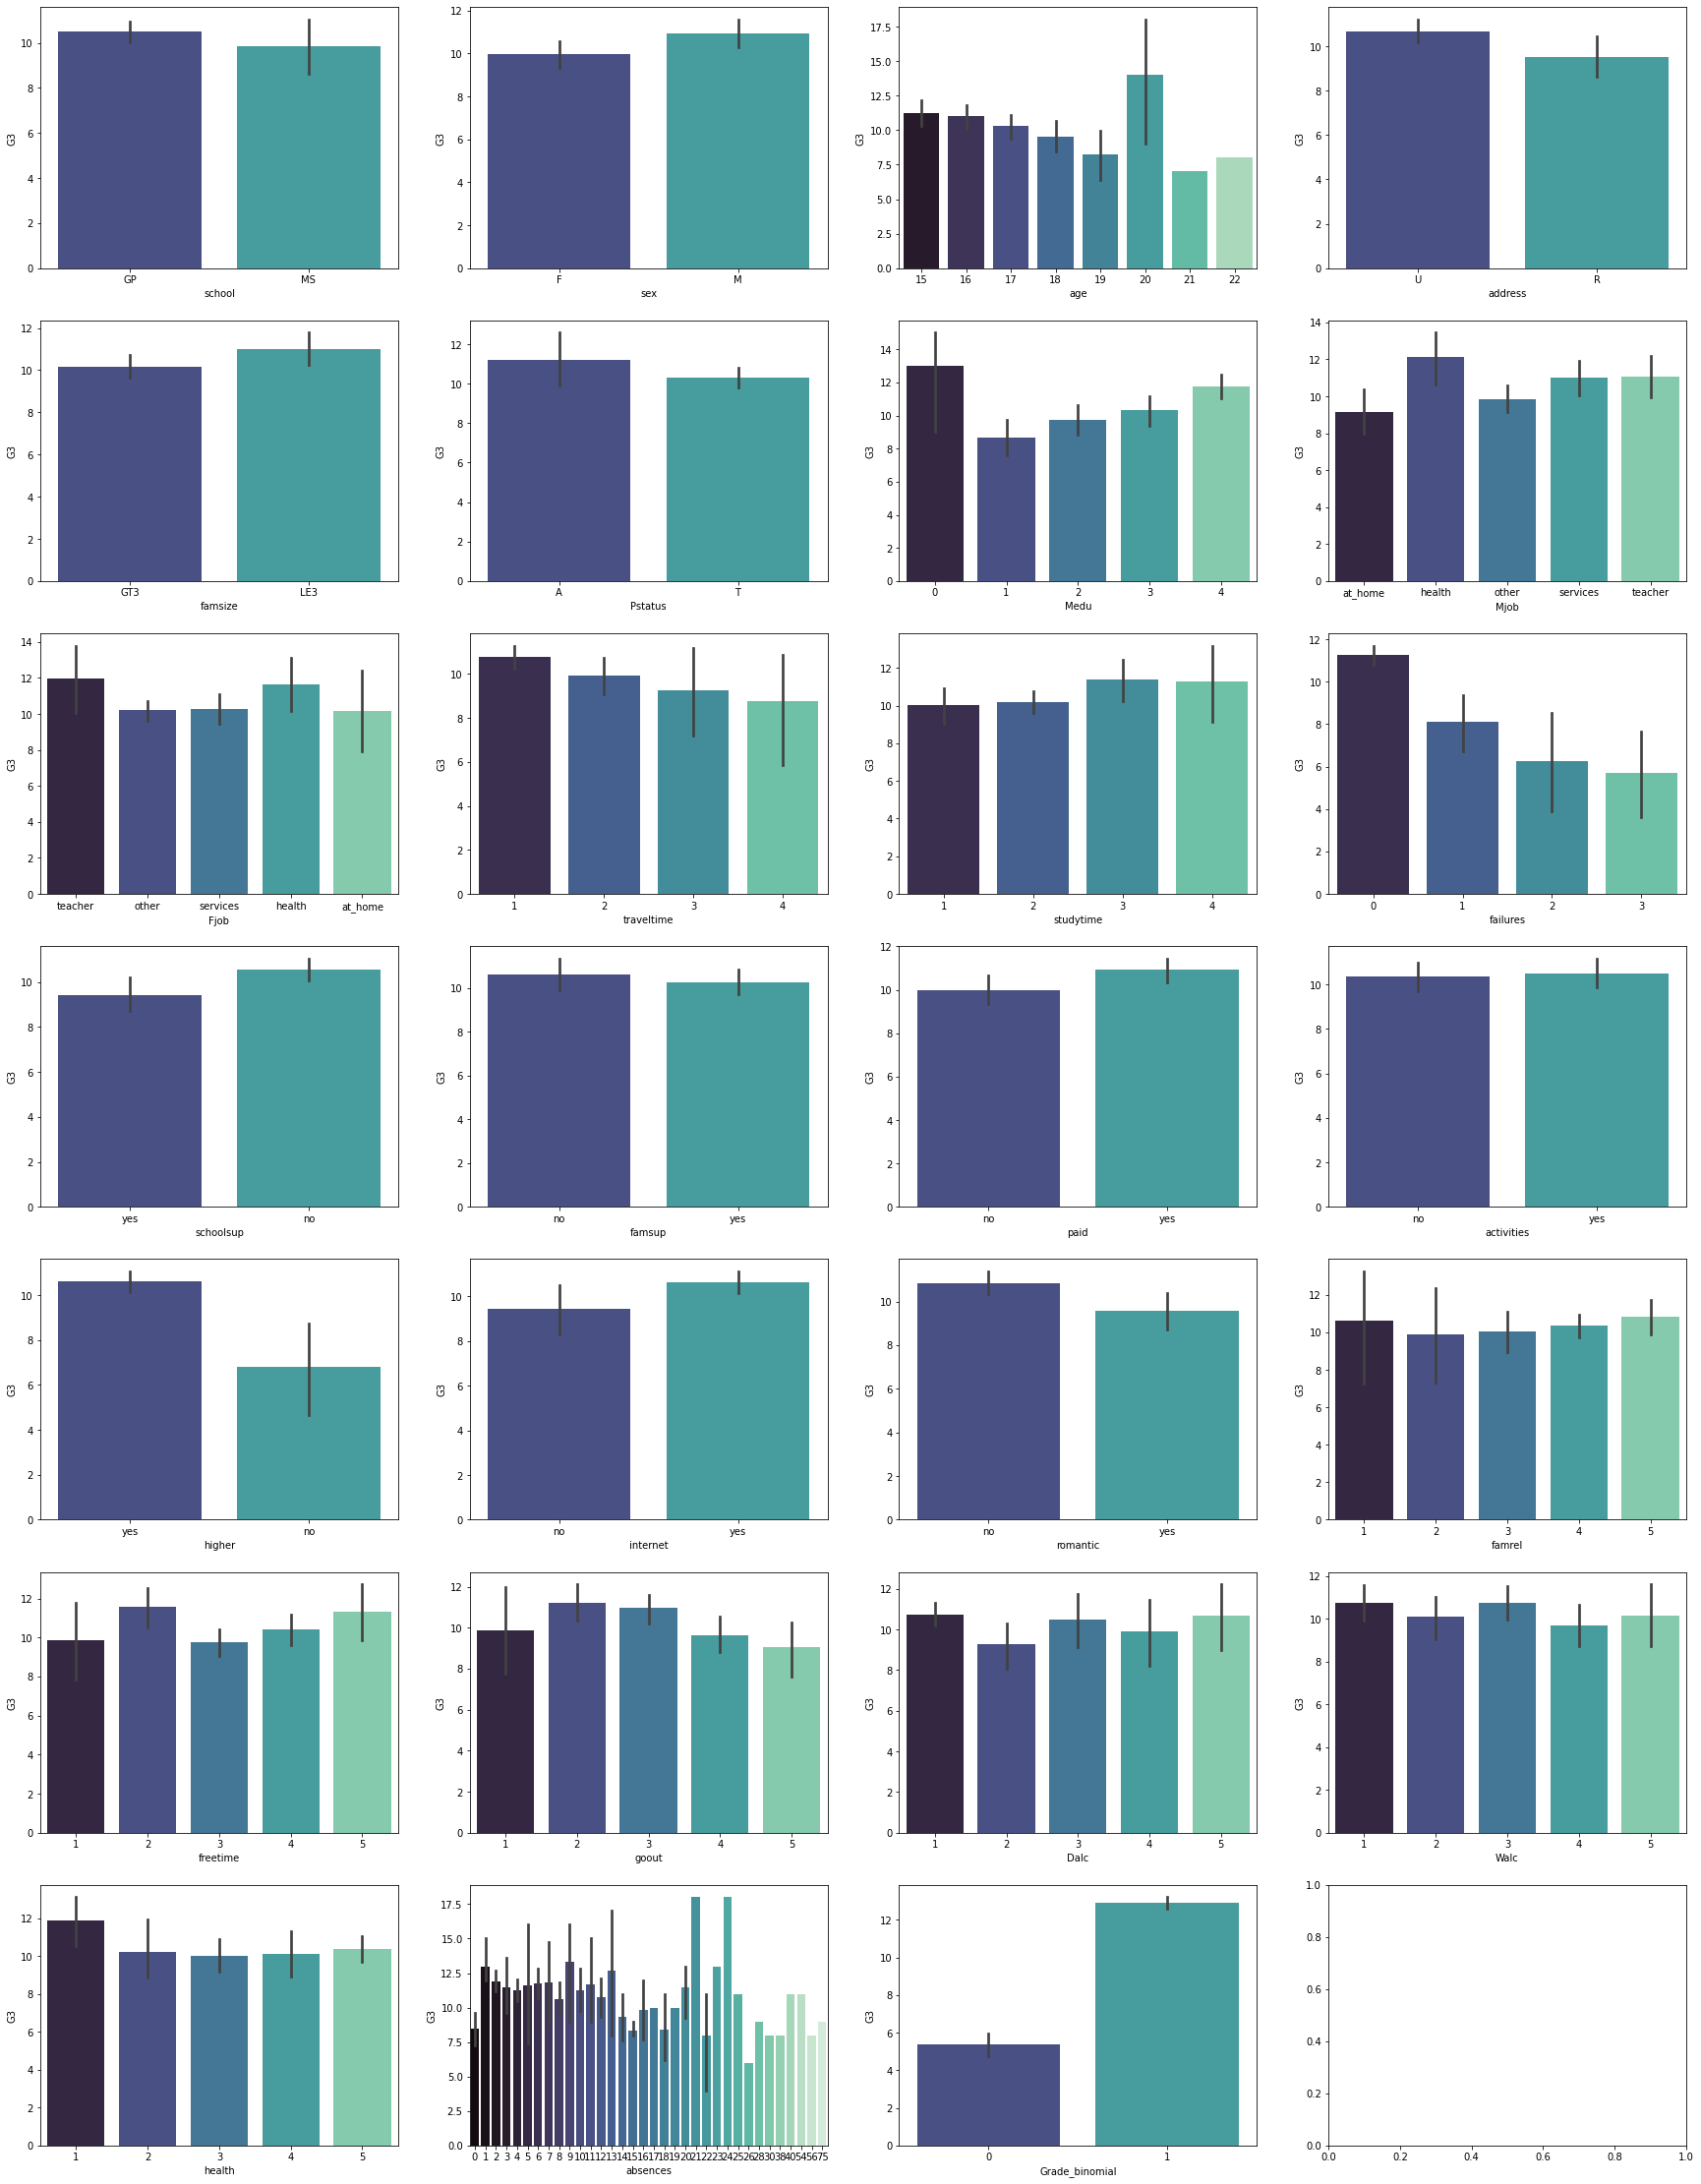

In [ ]:
i=0
n=0
fig , ax = plt.subplots(nrows = 7, ncols = 4, figsize=(30,40))

for feature in colonne:
  if i==4:
    i=0
    n=n+1

  sns.barplot(x=feature, y=target, data=df, ax=ax[n][i],palette="mako")
  i=i+1


plt.show()

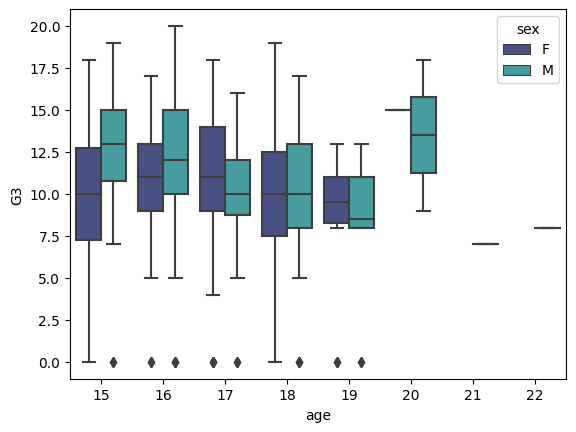

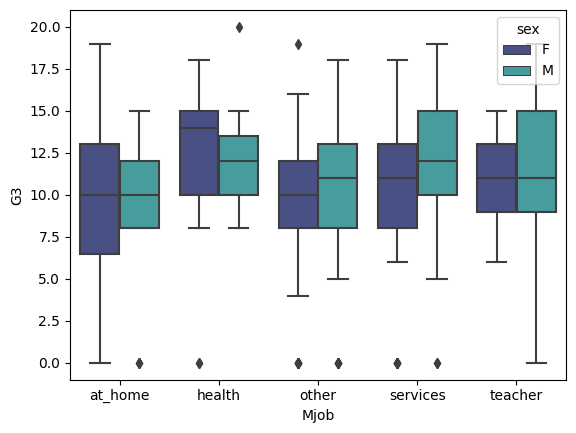

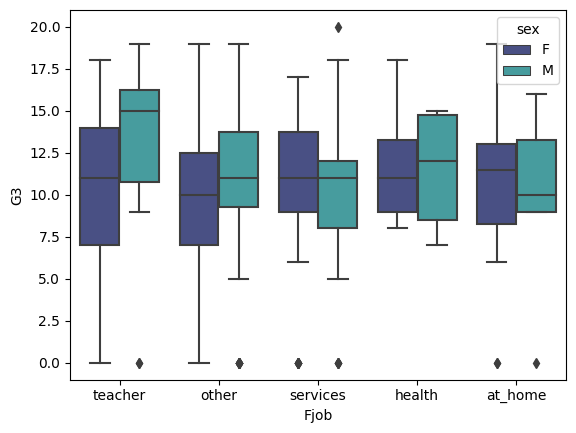

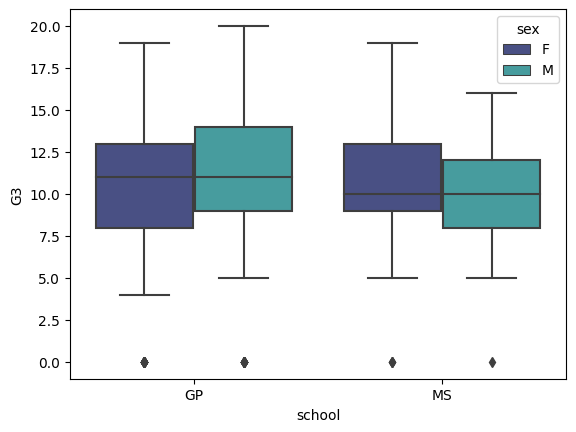

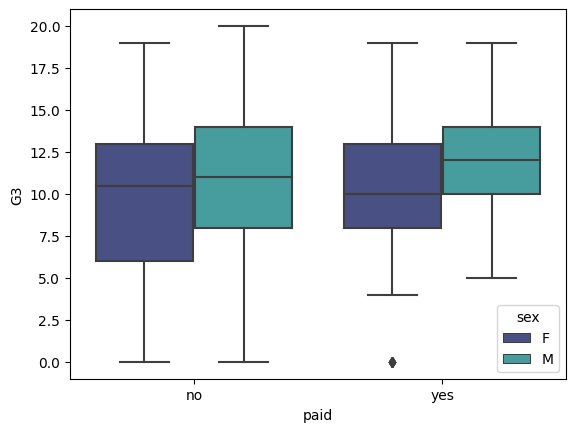

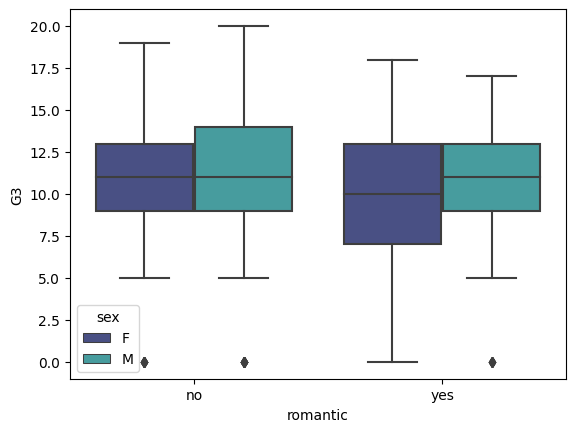

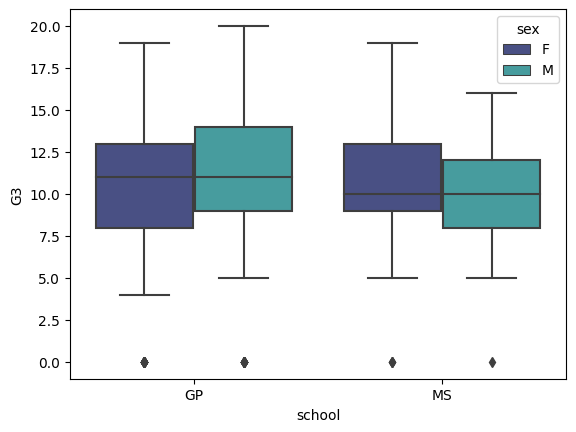

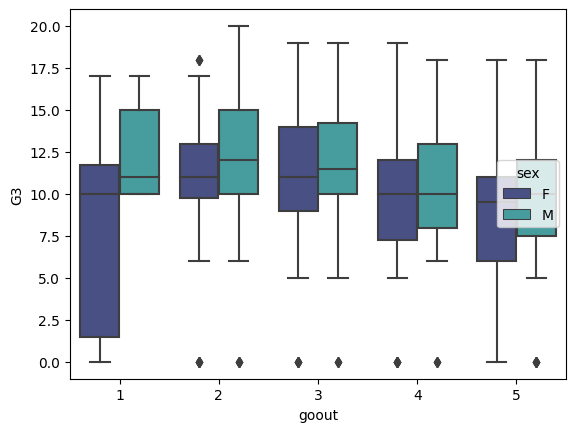

In [ ]:
var=["age","Mjob","Fjob","school","paid","romantic","school","goout"]
for i in var:
  sns.boxplot(data = df,y = 'G3',x = i,hue = 'sex' ,palette="mako")
  plt.show()

In [ ]:
df_cop=df[:]
df_cop['Fedu_high'] = [1 if s >=3 else 0 for s in df["Fedu"]] #On transforme la target en binomial
print(df_cop['Fedu_high'].describe()  )
df_cop['Medu_high'] = [1 if s >=3 else 0 for s in df["Medu"]] #On transforme la target en binomial
df_cop['Medu_high'].describe()


count    395.000000
mean       0.496203
std        0.500620
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Fedu_high, dtype: float64


count    395.000000
mean       0.582278
std        0.493809
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Medu_high, dtype: float64

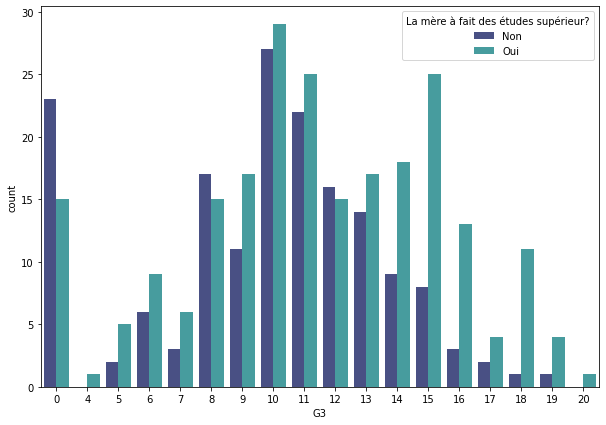

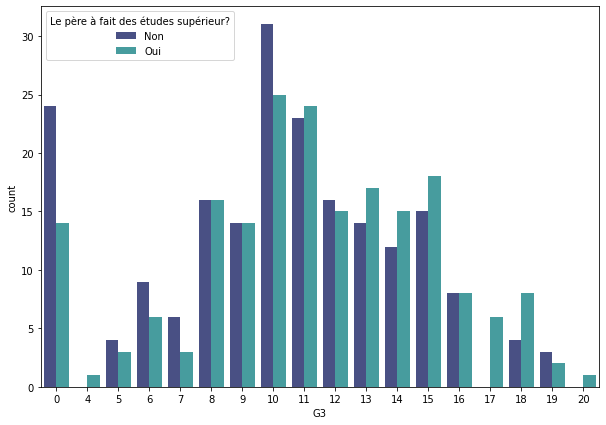

In [ ]:
var=["Medu_high","Dalc","Walc"]
#for i in var:
plt.figure(figsize=(10,7))
sns.countplot(x="G3", data=df_cop,hue = 'Medu_high',palette="mako")
plt.legend(title="La mère à fait des études supérieur?", labels=["Non","Oui"])
plt.show()
plt.figure(figsize=(10,7))
sns.countplot(x="G3", data=df_cop,hue = 'Fedu_high',palette="mako")
plt.legend(title="Le père à fait des études supérieur?", labels=["Non","Oui"])
plt.show()

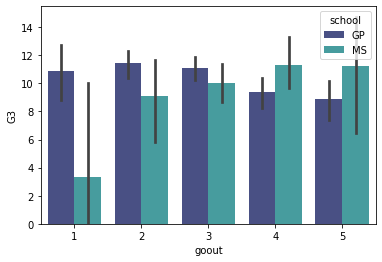

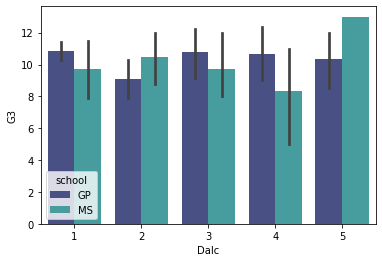

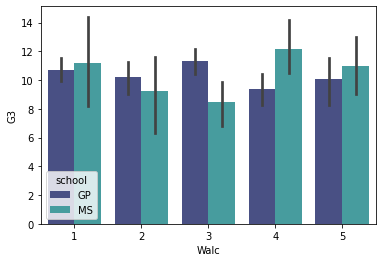

In [ ]:
var=["goout","Dalc","Walc"]
for i in var:
  sns.barplot(data = df
            ,y = 'G3'
            ,x = i
            ,hue = 'school',palette="mako")
  plt.show()

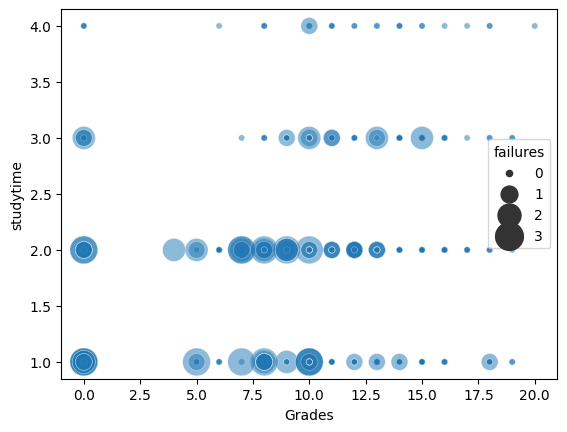

In [ ]:
sns.scatterplot(data=df, y="studytime", x="G3", size="failures", alpha=0.5, sizes=(20, 400))
plt.xlabel("Grades")
# show the graph
plt.show()

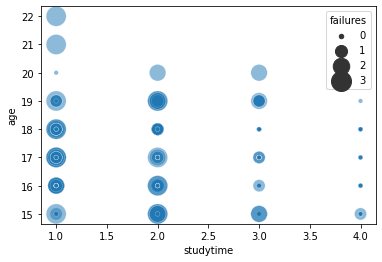

In [ ]:
sns.scatterplot(data=df, y="age", x="studytime", size="failures", alpha=0.5, sizes=(20, 400), palette="mako")

# show the graph
plt.show()

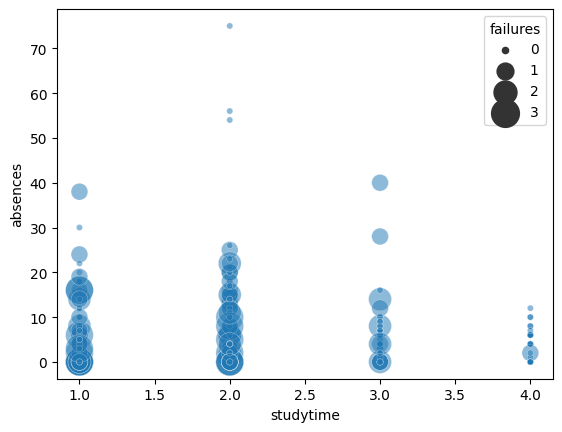

In [ ]:
sns.scatterplot(data=df, y="absences", x="studytime", size="failures", alpha=0.5, sizes=(20, 400), palette="mako")

# show the graph
plt.show()

##Regression linéaire multiple


In [ ]:
newdf2=newdf[:]
del newdf2['Mjob_health']
del newdf2['Mjob_other']
del newdf2['Mjob_services']
del newdf2['Mjob_teacher']
del newdf2['Fjob_health']
del newdf2['Fjob_other']
del newdf2['Fjob_services']
del newdf2['Fjob_teacher']

X = newdf2.drop(target, axis=1)  #Variable explicative
y = newdf2[target]          #Variable à expliquée
y.head()
#Création d'une colonne de 1(pour le modele OLS)
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

#Backward Elimination p value
vars = list(X.columns)
pmax = 1
while (len(vars)>0):
    p= []
    X_1 = X[vars]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = vars)
    pmax = max(p)
    var_with_p_max = p.idxmax()
    if(pmax>0.05):
        vars.remove(var_with_p_max)
    else:
        break
#Variables séléctionnée
vars_selected = vars
print(vars_selected)

#Backward Elimination R2
var_del=[]
var2 = list(X.columns)
X_1 = X[var2]
X_1 = sm.add_constant(X_1)
model = sm.OLS(y,X_1).fit()
rmax2=model.rsquared_adj
print(len(var2))
while (len(var2)>0):
    rmax=0
    ind_max=0
    for i in range(0,len(var2)):
        p=var2[:]
        p.remove(var2[i])
        X_1 = X[p]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y,X_1).fit()
        r_adj=model.rsquared_adj
        if (rmax<r_adj):
            rmax=r_adj
            ind_max=i
    if(rmax2<rmax):
        var_del.append(var2[ind_max])
        rmax2=rmax
        del var2[ind_max]
    else:
        break
#Variable à garder
vars_selected = var2
print(vars_selected)

#Forward value p value
var_rest = list(X.columns)
var3=[]
pmin2=1
while (len(var_rest)>0):
    pmin=1
    ind_min=0
    for i in range(0,len(var_rest)):
        p=var3[:]
        p.append(var_rest[i])
        X_1 = X[p]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y,X_1).fit()
        p_va=model.pvalues[-1]

        if (pmin>p_va):
            pmin=p_va
            ind_min=i
    if(pmin<0.05):
        var3.append(var_rest[ind_min])
        pmin2=pmin
        del var_rest[ind_min]
    else:
        break
#Variable séléctionner
vars_selected = var3
print(vars_selected)

#Forward value R2
var_rest = list(X.columns)
var4=[]
rmax2=0
while (len(var_rest)>0):
    rmax=0
    ind_max=0
    for i in range(0,len(var_rest)):
        p=var4[:]
        p.append(var_rest[i])
        X_1 = X[p]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y,X_1).fit()
        r_adj=model.rsquared_adj
        if (rmax<r_adj):
            rmax=r_adj
            ind_max=i
    if(rmax2<rmax):
        var4.append(var_rest[ind_max])
        rmax2=rmax
        del var_rest[ind_max]
    else:
        break
#variable à garder
vars_selected = var4
print(var_del)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

['Medu', 'failures', 'goout', 'sex_M', 'romantic_yes']
25
['age', 'Medu', 'studytime', 'failures', 'freetime', 'goout', 'health', 'absences', 'sex_M', 'address_U', 'famsize_LE3', 'schoolsup_yes', 'famsup_yes', 'higher_yes', 'romantic_yes']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

['failures', 'Medu', 'sex_M', 'goout', 'romantic_yes']
['Fedu', 'paid_yes', 'Pstatus_T', 'Dalc', 'Walc', 'internet_yes', 'school_MS', 'famrel', 'traveltime', 'activities_yes']


Les coeff du modèle linaires sont:
Medu :  0.6126630892798879
failures :  -2.0032730907568004
goout :  -0.3870308976080923
sex_M :  0.7319103828129019
romantic_yes :  -0.8701724640629809
Performance du modèle sur la base d'apprentissage:
L'erreur quadratique moyenne est 4.155768473991616
Le score R2 est 0.17777628414695557


La performance du modèle sur la base de test:
L'erreur quadratique moyenne est 4.099701978183855
Le score R2 est 0.18032101607977125


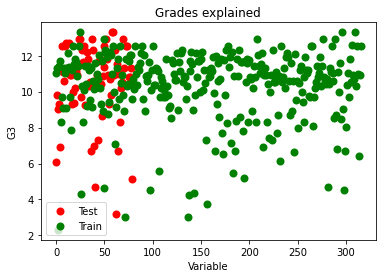

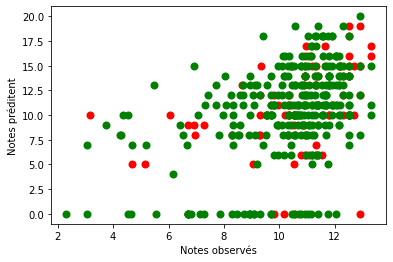

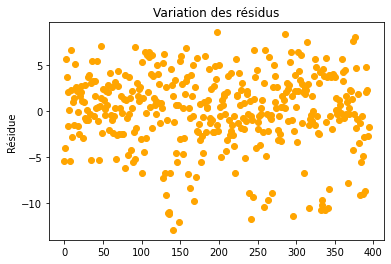

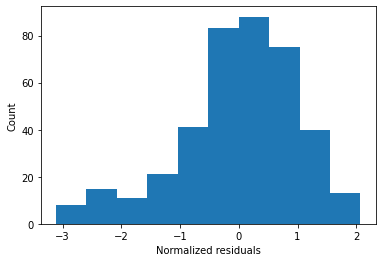

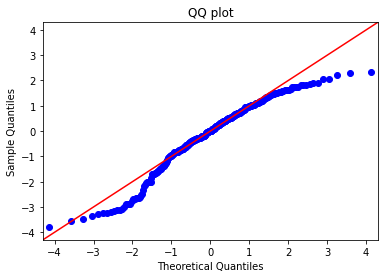

Les coeff du modèle linaires sont:
age :  -0.24048648419725166
Medu :  0.4946055978373744
studytime :  0.8223624019712347
failures :  -1.7285446934168007
freetime :  0.2782320806023939
goout :  -0.43273615472070126
health :  -0.17196962580574293
absences :  0.06364824559575943
sex_M :  1.1336751699695702
address_U :  0.5325981401009687
famsize_LE3 :  0.6472148489710376
schoolsup_yes :  -0.8996706236715843
famsup_yes :  -0.977795457043672
higher_yes :  1.8911511625125679
romantic_yes :  -1.0015212344858477
Performance du modèle sur la base d'apprentissage:
L'erreur quadratique moyenne est 4.003328023127139
Le score R2 est 0.23699099391876022


La performance du modèle sur la base de test:
L'erreur quadratique moyenne est 4.170047068829626
Le score R2 est 0.1519506232333273


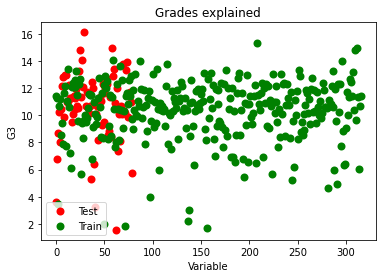

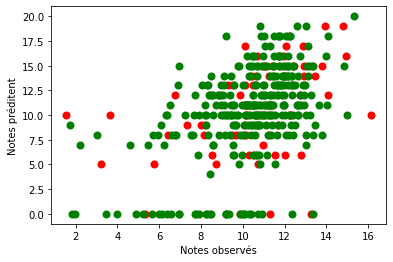

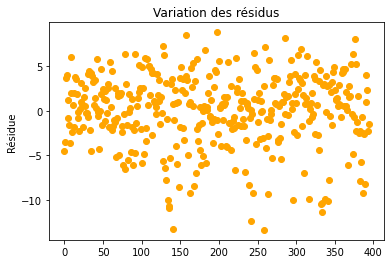

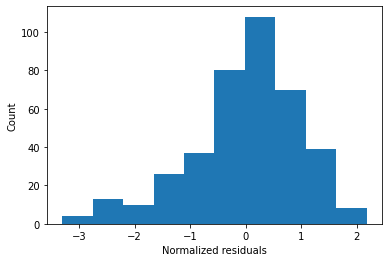

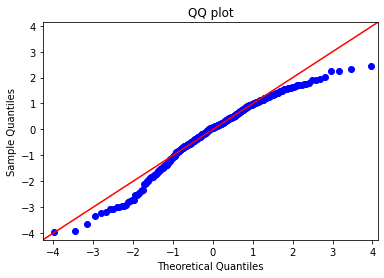

Les coeff du modèle linaires sont:
failures :  -2.0032730907567977
Medu :  0.6126630892798867
sex_M :  0.7319103828129027
goout :  -0.3870308976080928
romantic_yes :  -0.8701724640629812
Performance du modèle sur la base d'apprentissage:
L'erreur quadratique moyenne est 4.155768473991616
Le score R2 est 0.17777628414695545


La performance du modèle sur la base de test:
L'erreur quadratique moyenne est 4.099701978183855
Le score R2 est 0.18032101607977136


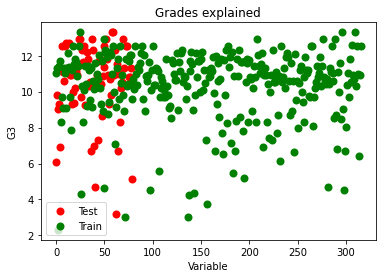

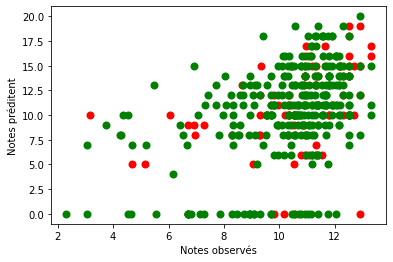

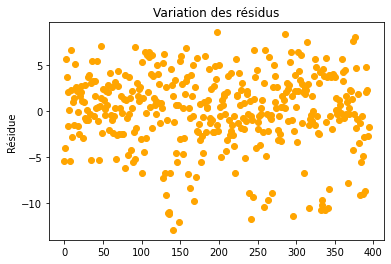

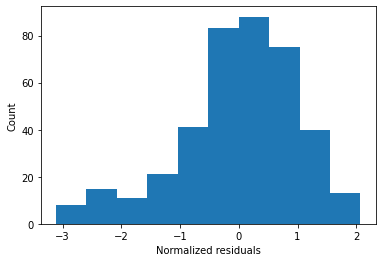

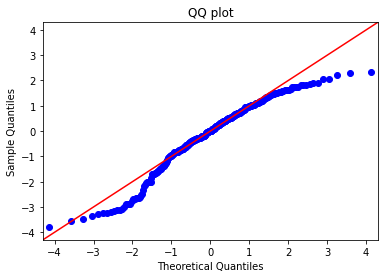

Les coeff du modèle linaires sont:
failures :  -1.728544693416801
Medu :  0.49460559783737523
sex_M :  1.1336751699695764
goout :  -0.43273615472070226
romantic_yes :  -1.0015212344858524
famsize_LE3 :  0.6472148489710354
schoolsup_yes :  -0.8996706236715859
studytime :  0.8223624019712363
absences :  0.0636482455957636
address_U :  0.5325981401009676
higher_yes :  1.8911511625125668
famsup_yes :  -0.9777954570436744
age :  -0.24048648419725033
freetime :  0.2782320806023937
health :  -0.17196962580574374
Performance du modèle sur la base d'apprentissage:
L'erreur quadratique moyenne est 4.003328023127139
Le score R2 est 0.23699099391876022


La performance du modèle sur la base de test:
L'erreur quadratique moyenne est 4.1700470688296285
Le score R2 est 0.1519506232333261


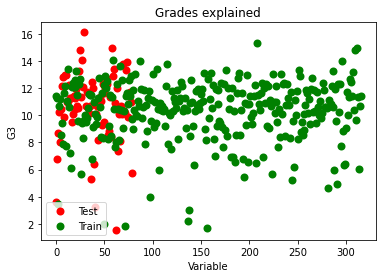

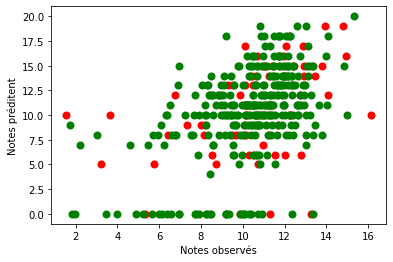

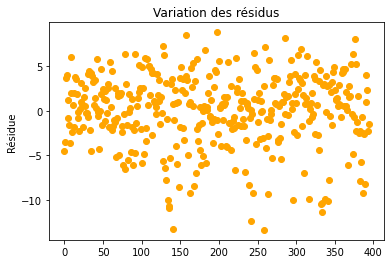

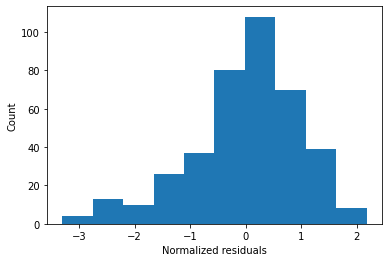

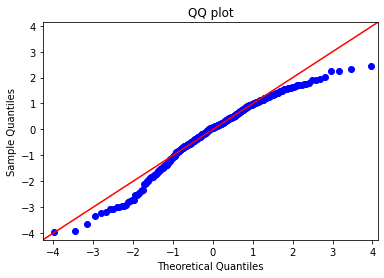

In [ ]:
for i in [vars,var2,var3,var4]:
  X=newdf2[i]
  Y=newdf2[target]
  stri="Variable: "
  for l in i:
    stri=stri+" " +l

  #base d'apprentissage et base de test
  from sklearn.model_selection import train_test_split

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42,shuffle=True)

  #entrainement du modèle
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error

  lmodellineaire = LinearRegression()
  lmodellineaire.fit(X_train, Y_train)
  print("Les coeff du modèle linaires sont:")
  c=lmodellineaire.coef_
  for j in range(len(i)):
    print(i[j], ": " , c[j])

  # Evaluation du training set
  from sklearn.metrics import r2_score
  y_train_predict = lmodellineaire.predict(X_train)
  rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
  r2 = r2_score(Y_train, y_train_predict)

  print("Performance du modèle sur la base d'apprentissage:")
  print("L'erreur quadratique moyenne est {}".format(rmse))
  print("Le score R2 est {}".format(r2))
  print('\n')


  # model evaluation for testing set
  y_test_predict = lmodellineaire.predict(X_test)
  rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
  r2 = r2_score(Y_test, y_test_predict)

  print("La performance du modèle sur la base de test:")
  print("L'erreur quadratique moyenne est {}".format(rmse))
  print('Le score R2 est {}'.format(r2))

  x_train=np.arange(0,len(X_train),1)
  X=np.arange(0,len(newdf2[i]),1)
  x_test=np.arange(0,len(X_test),1)

  fig = plt.figure()
  plt.scatter(x_test,y_test_predict,color = 'red', linewidth=2.0)
  plt.scatter(x_train,y_train_predict,color = 'green', linewidth=2.0)
  plt.legend(["Test", "Train"], loc ="lower left")
  plt.title('Grades explained')
  plt.xlabel('Variable')
  plt.ylabel('G3')
  plt.show()



  fig = plt.figure()
  plt.scatter( y_test_predict,Y_test, color = 'red', linewidth=2.0)
  plt.scatter( y_train_predict,Y_train ,color = 'green', linewidth=2.0)
  #plt.title("stri")
  plt.ylabel('Notes préditent')
  plt.xlabel('Notes observés')
  plt.show()

  residues = (Y - lmodellineaire.predict(newdf2[i]))
  residues_std = residues/math.sqrt(sum(residues**2)/(len(residues)-1))

  plt.scatter( X,residues, color = 'orange')
  plt.title("Variation des résidus")
  plt.ylabel('Résidue')
  plt.show()
    #Histograme
  plt.hist(residues_std)
  plt.ylabel('Count')
  plt.xlabel('Normalized residuals')

    #QQ plot
  fig = sm.qqplot(residues_std, stats.t, fit=True,line='45')
  plt.title("QQ plot")
  plt.show()

In [ ]:
for i in [vars,var2,var4]:
  X=newdf2[i]
  Y=newdf2[target]
  X_1 = sm.add_constant(X)

  model = sm.GLM(Y,X_1)
  results = model.fit()

  print(results.summary())
  print()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     G3   No. Observations:                  395
Model:                            GLM   Df Residuals:                      389
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          17.417
Method:                          IRLS   Log-Likelihood:                -1121.8
Date:                Tue, 29 Nov 2022   Deviance:                       6775.2
Time:                        19:47:39   Pearson chi2:                 6.78e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.6342      0.824     12.900   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##Modele régression binomiale

In [ ]:
df_normal['Grade_binomial'] = [1 if s >10 else 0 for s in df[target]] #On transforme la target en binomial
df_normal['Grade_binomial'].describe()

count    395.000000
mean       0.529114
std        0.499785
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Grade_binomial, dtype: float64

In [ ]:
cols = ["age","Medu","Fedu","traveltime","studytime","failures","famrel","freetime","goout","health","absences"]
df2=df[cols]
from sklearn import preprocessing

Train set: (316, 11) (316,)
Test set: (79, 11) (79,)
[[32  8]
 [17 22]]
Confusion matrix, without normalization
[[32  8]
 [17 22]]


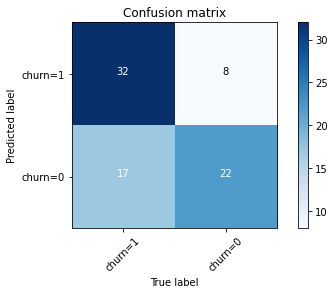

              precision    recall  f1-score   support

           0       0.73      0.56      0.64        39
           1       0.65      0.80      0.72        40

    accuracy                           0.68        79
   macro avg       0.69      0.68      0.68        79
weighted avg       0.69      0.68      0.68        79



0.6105419290907896

In [ ]:
X=df_normal[cols]

Y=df_normal['Grade_binomial']

X = preprocessing.StandardScaler().fit(X).transform(X) #normalisation des données
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#Modeling (Logistic Regression with Scikit-learn)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
#Prediction
yhat = LR.predict(X_test)
yhat

yhat_prob = LR.predict_proba(X_test)
yhat_prob

#Evaluation
from sklearn.metrics import jaccard_score
#jaccard_score(y_test, yhat,pos_label=0)
#Matrice de confusion
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
plt.show()

print (classification_report(y_test, yhat))

#log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

Train set: (316, 5) (316,)
Test set: (79, 5) (79,)
[[35  5]
 [17 22]]
Confusion matrix, without normalization
[[35  5]
 [17 22]]


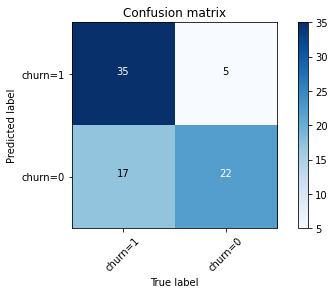

              precision    recall  f1-score   support

           0       0.81      0.56      0.67        39
           1       0.67      0.88      0.76        40

    accuracy                           0.72        79
   macro avg       0.74      0.72      0.71        79
weighted avg       0.74      0.72      0.71        79

Train set: (316, 15) (316,)
Test set: (79, 15) (79,)
[[31  9]
 [15 24]]
Confusion matrix, without normalization
[[31  9]
 [15 24]]


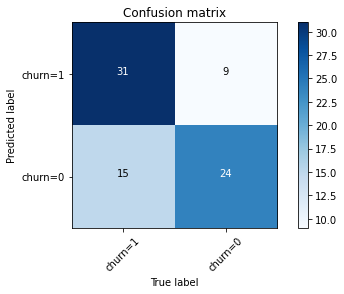

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        39
           1       0.67      0.78      0.72        40

    accuracy                           0.70        79
   macro avg       0.70      0.70      0.69        79
weighted avg       0.70      0.70      0.69        79

Train set: (316, 15) (316,)
Test set: (79, 15) (79,)
[[31  9]
 [15 24]]
Confusion matrix, without normalization
[[31  9]
 [15 24]]


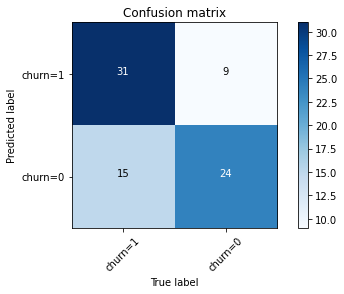

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        39
           1       0.67      0.78      0.72        40

    accuracy                           0.70        79
   macro avg       0.70      0.70      0.69        79
weighted avg       0.70      0.70      0.69        79



In [ ]:
from sklearn import preprocessing
for i in [vars,var2,var4]:
    X=df_normal[i]
    Y=df_normal['Grade_binomial']

    X = preprocessing.StandardScaler().fit(X).transform(X) #normalisation des données
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
    print ('Train set:', X_train.shape,  y_train.shape)
    print ('Test set:', X_test.shape,  y_test.shape)

    #Modeling (Logistic Regression with Scikit-learn)
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
    LR
    #Prediction
    yhat = LR.predict(X_test)
    yhat

    yhat_prob = LR.predict_proba(X_test)
    yhat_prob

    #Evaluation
    from sklearn.metrics import jaccard_score
    #jaccard_score(y_test, yhat,pos_label=0)
    #Matrice de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    import itertools
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.xlabel('True label')
        plt.ylabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[1,0]))
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')
    plt.show()

    print (classification_report(y_test, yhat))

    #log loss
    from sklearn.metrics import log_loss
    log_loss(y_test, yhat_prob)

In [ ]:
import statsmodels.api as sm
for i in [vars,var2,var3,var4]:
  X=newdf2[i]

  Y=df_normal['Grade_binomial']

  X_1 = sm.add_constant(X)
  model = sm.GLM(Y,X_1, family=sm.families.Binomial())


  results = model.fit()

  print(results.summary())
  print()

                 Generalized Linear Model Regression Results                  
Dep. Variable:         Grade_binomial   No. Observations:                  395
Model:                            GLM   Df Residuals:                      389
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -241.84
Date:                Fri, 25 Nov 2022   Deviance:                       483.69
Time:                        07:51:55   Pearson chi2:                     383.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5291      0.427      1.240   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Regression Poisson

In [ ]:
corrélation = newdf.corr()
cor_target = abs(corrélation["absences"])
#On selectione les variales avec une correlation plus importante
relevant_features = cor_target[cor_target>0.1]
relevant_features

age             0.175230
Medu            0.100285
Dalc            0.111908
Walc            0.136291
absences        1.000000
Pstatus_T       0.134937
internet_yes    0.101701
romantic_yes    0.153384
Name: absences, dtype: float64

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'schoolsup_yes',
       'famsup_yes', 'paid_yes', 'activities_yes', 'higher_yes',
       'internet_yes', 'romantic_yes'],
      dtype='object')
(296, 8)
(99, 8)
(296,)
(99,)
coef:
traveltime :  0.13974414283352132
studytime :  0.14905297196052805
freetime :  0.018838587541446208
goout :  0.04456331012411143
Dalc :  0.10128349724714662
Walc :  0.029050655585028902
health :  0.11796058566662915
paid_yes :  0.09191022151210944
Performance du modèle sur la base d'apprentissage:
La dispersion est de 0.0727362497594175


La performance du modèle sur la base de test:
La dispersion est de 0.06967183441161395


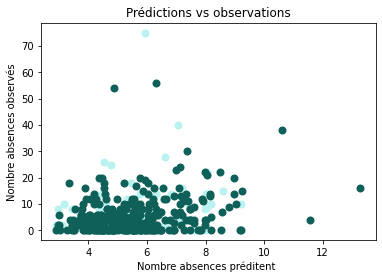

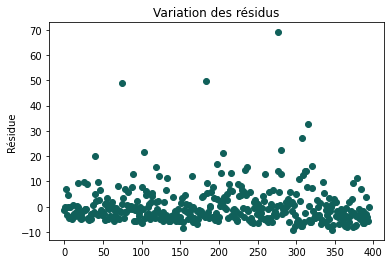

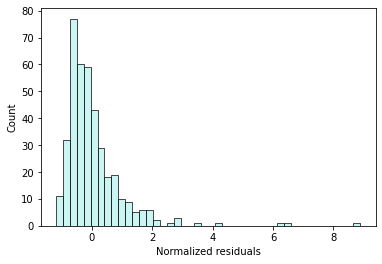

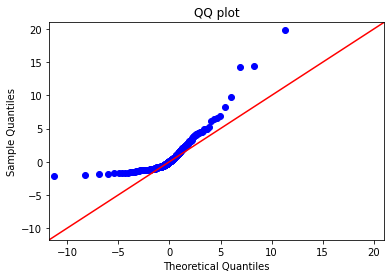

In [ ]:
nwfd2=newdf[:]
n=["traveltime","studytime","freetime","goout","Dalc","Walc","health","paid_yes","sex_M","romantic_yes","internet_yes"]
l=["age","Medu","romantic_yes","internet_yes","Walc","Dalc","traveltime","studytime",'goout']
p=["age","Medu","Fedu","traveltime","goout","failures","schoolsup_yes","higher_yes"]
g=["age","Medu","Fedu","goout","internet_yes","failures","romantic_yes","higher_yes"]
i=newdf2.columns.drop("absences")
print(i)
X=newdf2[g]
Y=newdf2["absences"]

#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,Y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

clf = linear_model.PoissonRegressor()
clf.fit(X_train, y_train)
clf.score(X_train,y_train)

print("coef:")
c=clf.coef_
for j in range(len(g)):
    print(n[j], ": " , c[j])


y_train_predict = clf.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
score= clf.score(X_train,y_train)

print("Performance du modèle sur la base d'apprentissage:")
print("La dispersion est de {}".format(score))
print('\n')


# model evaluation for testing set
y_test_predict = clf.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
score= clf.score(X_test,y_test)

print("La performance du modèle sur la base de test:")
print("La dispersion est de {}".format(score))

fig = plt.figure()
plt.scatter( y_test_predict,y_test, color = '#b9f2f0', linewidth=2.0)
plt.scatter( y_train_predict,y_train ,color = '#10605a', linewidth=2.0)
#plt.title("stri")
plt.ylabel('Nombre absences observés')
plt.xlabel('Nombre absences préditent ')
plt.title("Prédictions vs observations")
plt.show()

residues = (Y - clf.predict(X))
residues_std = residues/math.sqrt(sum(residues**2)/(len(residues)-1))
X2=np.arange(0,len(X),1)
plt.scatter( X2,residues, color = '#10605a')
plt.title("Variation des résidus")
plt.ylabel('Résidue')
plt.show()
  #Histograme
sns.histplot(residues_std ,color='#b9f2f0')
#plt.hist(residues_std)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')

  #QQ plot
fig = sm.qqplot(residues_std, stats.t, fit=True,line='45')
plt.title("QQ plot")
plt.show()




In [ ]:
import statsmodels.api as sm
n=["traveltime","goout","Dalc","Walc","health","paid_yes","sex_M","romantic_yes","internet_yes"]
l=["age","Medu","romantic_yes","internet_yes","Walc","Dalc","traveltime","studytime",'goout']
i=newdf2.columns.drop("absences")
print(i)
X=newdf2[g]
Y=newdf2["absences"]
X_1 = sm.add_constant(X)
X_1 = sm.add_constant(X)

model = sm.GLM(Y,X_1, family=sm.families.Poisson())
results = model.fit()

print(results.summary())

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G3', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'schoolsup_yes',
       'famsup_yes', 'paid_yes', 'activities_yes', 'higher_yes',
       'internet_yes', 'romantic_yes'],
      dtype='object')
                 Generalized Linear Model Regression Results                  
Dep. Variable:               absences   No. Observations:                  395
Model:                            GLM   Df Residuals:                      386
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1962.9
Date:                Tue, 29 Nov 2022   Deviance:                       2916.4
Time:                        20:24:34   Pearson chi2:                 3.64e+03
No. Iterations:

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##AFC

In [ ]:
#on choisit d'effectuer une AFc sur 2 variables : temps de travail et la note G3
#pour cela il faut convertir G3 en variable qualitative

df["Note Qualitative"] = "mauvais"

for i in range(len(df)):
  note = df["G3"][i]
  if note >= 15 :
    df["Note Qualitative"][i] = 'bon'
  elif note >=10 :
    df["Note Qualitative"][i] = 'moyen'
  elif note < 10 :
    df["Note Qualitative"][i] = 'mauvais'

#obtenons maintenant le tableau de fréquence en fonction de ces données

# Tableau de contingence
X = "Note Qualitative"
Y = "studytime"

cont = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
print(cont)

In [ ]:
!pip install fanalysis

from fanalysis.ca import CA
%matplotlib inline

In [ ]:
X = cont.to_numpy()
my_ca = CA(row_labels=df.index.values, col_labels=df.columns.values)
my_ca.fit(X)
df_rows = my_ca.row_topandas()
df_cols = my_ca.col_topandas()
my_ca.mapping(num_x_axis=1, num_y_axis=2)

#https://github.com/OlivierGarciaDev/fanalysis/blob/master/doc/ca_tutorial.ipynb
